#### Importing the libraries

In [173]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly import tools
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


## Data Cleaning 

### Data understanding & Data Types 

In [175]:
pd.set_option('Display.max_columns', 75)

In [176]:
# read the application data csv and print top 5 rows
application_data_df=pd.read_csv(r"application_data.csv")
application_data_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [177]:
#print info of the application data
application_data_df.info
# from below output we can see that there are 122 columns andthree data types present all
#together and we have to further explore this to convert or change types and fix the columns

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

In [178]:
#print the shape -> to get number of rows and columns
application_data_df.shape #this dataframe has 307511 rows and 122 columns
print('Number of rows in application_data_df ',application_data_df.shape[0])
print('Number of rows in application_data_df ',application_data_df.shape[1])

Number of rows in application_data_df  307511
Number of rows in application_data_df  122


#### Data Cleaning

### Identify and remove columns that have significant null values

Number of columns with >= 35% null values that need to be dropped are  49


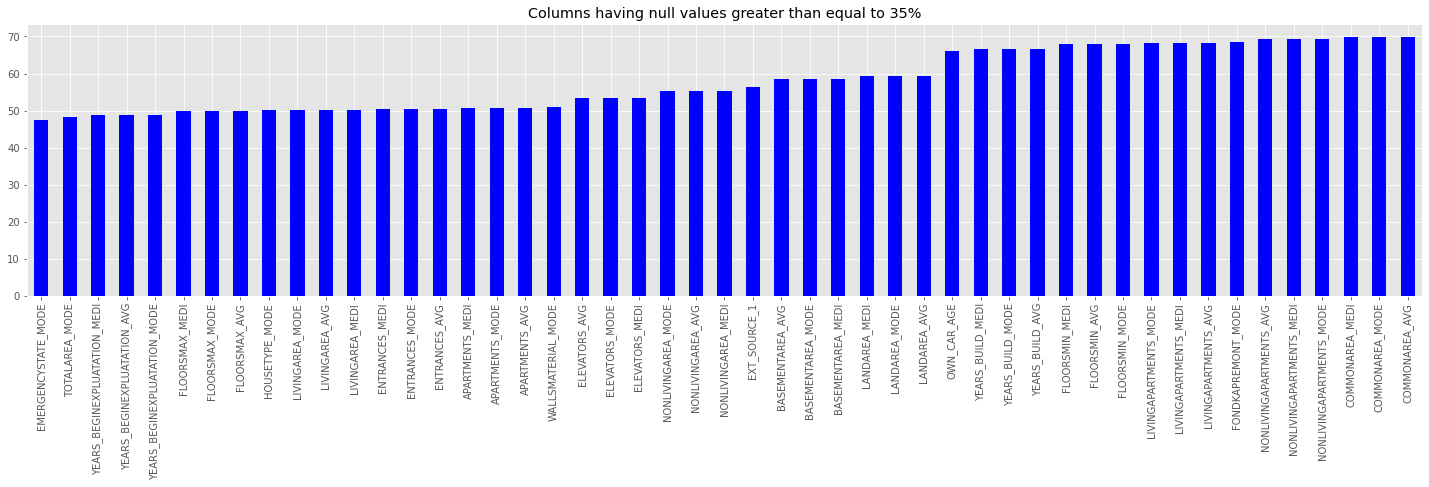

In [179]:
#let us drop columns with more null values before analyzing and fixing other important columns 
# as columns with more null values won't help in analysis

columns_null_values_pct = application_data_df.isnull().mean() * 100 
columns_gte_35_pct_null_values = columns_null_values_pct[columns_null_values_pct.values >= 35]
print('Number of columns with >= 35% null values that need to be dropped are ', len(columns_gte_35_pct_null_values))
#print('')
plt.figure(figsize=(25,5))
columns_gte_35_pct_null_values.sort_values().plot(kind='bar', color='blue')
plt.title('Columns having null values greater than equal to 35%')
plt.show()

In [180]:
# lets go ahead and drop the above columns
application_data_df.drop(columns_gte_35_pct_null_values.index, inplace=True, axis=1)

In [181]:
application_data_df.shape 
#Note that we initially had (307511, 122) columns and now we dropped 49 columns making the 
#column count 73
print('Shape of the dataframe after dropping null columns: ')
print('Number of rows in application_data_df',application_data_df.shape[0])
print('Number of rows in application_data_df ',application_data_df.shape[1])

Shape of the dataframe after dropping null columns: 
Number of rows in application_data_df 307511
Number of rows in application_data_df  73


### Handling actual columns required for analysis -> fixing data types, incorrect data/values and missing values

In [10]:
# lets observe null values again for columns which we decided to keep for analysis

mean_pct_main_columns = application_data_df.isnull().mean()*100
mean_pct_main_columns.sort_values(ascending = False).head(25) 
# we can see that only 18 columns have null values in them. So lets go ahead and fix them

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
NAME_INCOME_TYPE               0.000000
FLAG_OWN_REALTY                0.000000
TARGET                         0.000000
FLAG_EMAIL                     0.000000
FLAG_PHONE                     0.000000
FLAG_CONT_MOBILE               0.000000
NAME_CONTRACT_TYPE             0.000000


### Fix columns that have significant null values


Task 1: OCCUPATION_TYPE  has  31.345545% null values so lets fix the null values for occuptaion type
Task 1 reason: Since OCCUPATION_TYPE is a categorical value we can use mode to fix the values
Task 2: Other columns which can be imputed with mode are -> AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT.
Task 2 reason: Since these columns are number of enquiries for a certain period before the date of application we can use mode because  every bank has a particular number of times/count for enquiry before processing and here we are dealing with only one bank hence we can assume it will be uniform and use mode.
Task 3: NAME_TYPE_SUITE can also be imputed with mode since its categorical

#### Imputation Analysis 

In [11]:

list_of_coulumns_to_be_replaced_with_mode = []
list_of_coulumns_to_be_replaced_with_mode = [col for col in application_data_df.columns if (col.startswith('AMT_REQ_CREDIT') or col in ['OCCUPATION_TYPE','NAME_TYPE_SUITE'])]
list_of_coulumns_to_be_replaced_with_mode

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [12]:
# fill the above columns with mode
for column in list_of_coulumns_to_be_replaced_with_mode:
    application_data_df[column].fillna(application_data_df[column].mode()[0], inplace=True)

In [13]:
#verify that above columns are populated with mode and all null values are imputed -> we should see 0
application_data_df[list_of_coulumns_to_be_replaced_with_mode].isnull().mean()*100

NAME_TYPE_SUITE               0.0
OCCUPATION_TYPE               0.0
AMT_REQ_CREDIT_BUREAU_HOUR    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
dtype: float64

#### Imputing numerical columns

##### Imputing EXT_SOURCE columns

##### Frst lets create a common box plot function that takes any number of rows and columns and other
##### customizable fields so that it will be easy for us to do analysis without repetitive code
##### and decided on right method -> mean/median/mode to impute the values with.

In [182]:
sns.set_style('darkgrid')
def getBoxPlots(ncols, nrows, data, columns, titles, rotation):
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows)
    if(ncols == 1 and nrows == 1):
       boxPlot = sns.boxplot(data=application_data_df[columns[0]])
       boxPlot.set_title(titles[0],weight='bold', y = -0.2, rotation = rotation)

    else:
        for i in range(nrows):
            for j in range(ncols):
                boxPlot = sns.boxplot(data=application_data_df[columns[i+j]],ax = ax[j])
                if len(titles) > 0:
                    boxPlot.set_title(titles[i+j],weight='bold', y = -0.2, rotation = rotation)
        
    
    fig.tight_layout()
    plt.show()
    
    
    
    

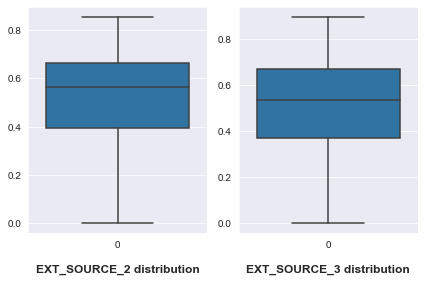

In [15]:
# get box plots for EXT_SOURCE_2 and EXT_SOURCE_3 and find if there are any outiers
getBoxPlots(2,1,application_data_df,['EXT_SOURCE_2','EXT_SOURCE_3'],['EXT_SOURCE_2 distribution','EXT_SOURCE_3 distribution'], rotation=0)

###### Imputing AMT_GOODS_PRICE,AMT_ANNUITY  columns

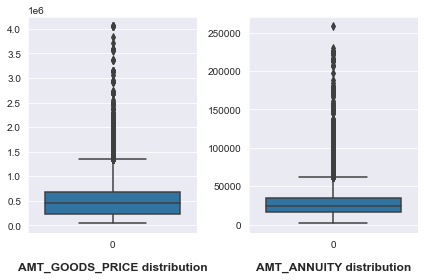

In [18]:
# get box plots for AMT_GOODS_PRICE and AMT_ANNUITY  and find if there are any outiers
getBoxPlots(2,1,application_data_df,['AMT_GOODS_PRICE','AMT_ANNUITY'],['AMT_GOODS_PRICE distribution','AMT_ANNUITY distribution'], rotation=0)

###### Imputing CNT_FAM_MEMBERS values

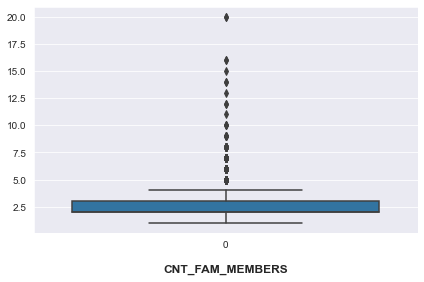

In [24]:
getBoxPlots(1,1,application_data_df,['CNT_FAM_MEMBERS'],
            ['CNT_FAM_MEMBERS'], rotation=0)

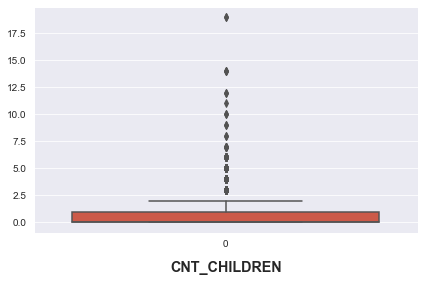

In [183]:
getBoxPlots(1,1,application_data_df,['CNT_CHILDREN'],
            ['CNT_CHILDREN'], rotation=0)

######  Imputing CODE GENDER values  -> check for NA values and  handle this to properly analyze our data as it one of the main columns

In [26]:
application_data_df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [27]:
# from the above it is clear its  a categorical value and we need to 
# impute XNA value via mode
application_data_df['CODE_GENDER'].replace({"XNA": "F"}, inplace=True)
# verify it is imputed properly. we should not see XNA in value counts
print('XNA is not present in CODE_GENDER column after imputationv --> ','XNA' not in application_data_df.CODE_GENDER.value_counts().index.tolist() )

XNA is not present in CODE_GENDER column after imputationv -->  True


#### Check which other columns have NA or XNA in them to impute them accordingly

In [28]:
print(application_data_df.FLAG_OWN_CAR.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.FLAG_OWN_REALTY.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.NAME_TYPE_SUITE.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.NAME_INCOME_TYPE.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.NAME_EDUCATION_TYPE.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.NAME_FAMILY_STATUS.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.NAME_HOUSING_TYPE.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.NAME_CONTRACT_TYPE.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.OCCUPATION_TYPE.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.REGION_RATING_CLIENT.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.ORGANIZATION_TYPE.value_counts()) #has some NA values

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow           

In [29]:
#since significant percent specified XNA  and also as we have seen maximum workforce
# occupation type is labourers lets treat XNA as missing values itself

application_data_df["ORGANIZATION_TYPE"].replace({"XNA": np.NaN}, inplace=True)
print('XNA is not present in ORGANIZATION_TYPE column after imputation --> ','XNA' not in application_data_df.ORGANIZATION_TYPE.value_counts().index.tolist() )

XNA is not present in ORGANIZATION_TYPE column after imputation -->  True


#### Lets drop columns not needed for analysis from dataframe

In [30]:
application_data_df['EXT_SOURCE'] = application_data_df['EXT_SOURCE_2']+application_data_df['EXT_SOURCE_3']

In [31]:
application_data_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [32]:
columns_to_be_dropped = ['REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','OWN_CAR_AGE','HOUR_APPR_PROCESS_START'
                        ,'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY'
                         ,'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2','EXT_SOURCE_3']
FLAGGED_COLUMNS = [col for col in application_data_df.columns if ((col.startswith('FLAG_') or col in columns_to_be_dropped) and (col not in ['FLAG_OWN_CAR','FLAG_OWN_REALTY']))]      
application_data_df.drop(FLAGGED_COLUMNS, inplace=True, axis=1)
application_data_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE'],
      dtype='object')

#### Convert DAYS_BIRTH and DAYS_EMPLOYED to years and add them as new columns

######  Analyze DAYS_BIRTH and DAYS_EMPLOYED before converting them to years and check for any corrections

In [33]:
days_col = [col for col in application_data_df if col.startswith('DAYS_')]
application_data_df[days_col].describe()

DAYS_BIRTH  DAYS_EMPLOYED
count  307511.000000  307511.000000
mean   -16036.995067   63815.045904
std      4363.988632  141275.766519
min    -25229.000000  -17912.000000
25%    -19682.000000   -2760.000000
50%    -15750.000000   -1213.000000
75%    -12413.000000    -289.000000
max     -7489.000000  365243.000000

In [34]:
# from above clearly these columns need correction as DAYS_BIRTH and DAYS_EMPLOYED cannot be negative
# So lets make the values of these columns positive
application_data_df[days_col] = abs(application_data_df[days_col])

#verify all values are positive
application_data_df[days_col].describe()

DAYS_BIRTH  DAYS_EMPLOYED
count  307511.000000  307511.000000
mean    16036.995067   67724.742149
std      4363.988632  139443.751806
min      7489.000000       0.000000
25%     12413.000000     933.000000
50%     15750.000000    2219.000000
75%     19682.000000    5707.000000
max     25229.000000  365243.000000

###### Convert age and work experience in days to years and rename columns appropriately

In [35]:
application_data_df['DAYS_BIRTH']= (application_data_df['DAYS_BIRTH']/365).astype(int)
application_data_df['DAYS_EMPLOYED']= (application_data_df['DAYS_EMPLOYED']/365).astype(int)
application_data_df.rename(columns = {'DAYS_BIRTH':'AGE_IN_YEARS', 'DAYS_EMPLOYED':'WORK_EXPERIENCE'}, inplace = True)

###### Lets bin age of the client , work experience in years, income amount of the client

In [36]:
age_category_labels = ['Very_Young','Young', 'Middle_Age', 'Senior_Citizen']
application_data_df['AGE_GROUP_Category'] = pd.qcut(application_data_df['AGE_IN_YEARS'],q=[0,.3,.6, 0.9, 1],
                              labels=age_category_labels)
work_category_labels = ['level_0','level_1', 'level_2', 'level_3', 'level_4']
application_data_df['WORK_YEARS_Category'] = pd.qcut(application_data_df['WORK_EXPERIENCE'],q=[0, .2, .4, .6, .8, 1],
                              labels=work_category_labels)
income_category_leves = ['Very_Low','Low', 'Medium', 'High','Very High']
application_data_df['INCOME_GROUP'] = pd.qcut(application_data_df['AMT_INCOME_TOTAL'],q=[0, .2, .5, .8, .95, 1],
                              labels=income_category_leves) # Choosing unequal percentiles because there are outliers

######  Change datatype of columns as appropriate

In [37]:
int_columns = ['CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
              'DEF_60_CNT_SOCIAL_CIRCLE']
application_data_df.loc[:,int_columns]=application_data_df.loc[:,int_columns].apply(lambda col: col.astype('int64'))

###### Lets create a new column called sum_members which will be sum of CNT_CHILDREN and CNT_FAM_MEMBERS 
###### Assumption made: if FAM_MEMBERS has children count then adding children count should not affect the analysis. In the cases where either of the columns are not correctly filled, a sum of two columns surely helps in better accurate analysis
###### Finally bin the new column

In [38]:
application_data_df['sum_members'] = application_data_df['CNT_CHILDREN'] + application_data_df['CNT_FAM_MEMBERS']
family_count_category_labels = ['Very_Small','Small', 'Medium', 'Large', 'Very_Large']
application_data_df['Family_GROUP'] = pd.qcut(application_data_df['AMT_INCOME_TOTAL'],q=[0, .2, .4, .6, .8, 1],
                              labels=income_category_leves)

######  Get a percentage of  clients social circle who defaulted in last 30 days and 60 days respectively

In [39]:
application_data_df['SOCIAL_CIRCLE_30_DAYS_DEF_PERCENTAGE'] = (application_data_df['DEF_30_CNT_SOCIAL_CIRCLE']/application_data_df['OBS_30_CNT_SOCIAL_CIRCLE'])*100
application_data_df['SOCIAL_CIRCLE_60_DAYS_DEF_PERCENTAGE'] = (application_data_df['DEF_60_CNT_SOCIAL_CIRCLE']/application_data_df['OBS_60_CNT_SOCIAL_CIRCLE'])*100


##  Univariate Analysis

###### Finding outliers in most important columns ->  

###### AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,

###### AGE_IN_YEARS,WORK_EXPERIENCE,

###### CNT_FAM_MEMBERS,CNT_CHILDREN,

###### AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,

###### AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,

###### AMT_REQ_CREDIT_BUREAU_YEAR

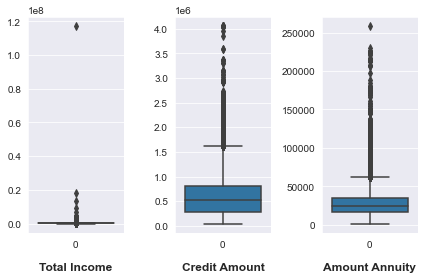

In [40]:
#lets analyse outliers for AMT_INCOME_TOTAL and AMT_CREDIT
getBoxPlots(3,1,application_data_df,['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY'],['Total Income', 'Credit Amount','Amount Annuity'],rotation = 0)


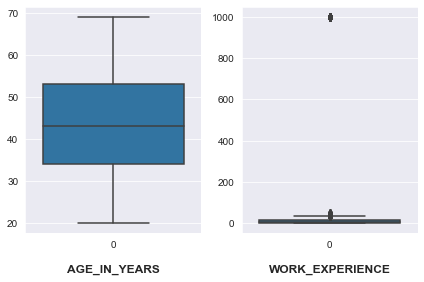

In [41]:
#lets analyse outliers for AGE_IN_YEARS and WORK_EXPERIENCE
getBoxPlots(2,1,application_data_df,['AGE_IN_YEARS','WORK_EXPERIENCE'],['AGE_IN_YEARS', 'WORK_EXPERIENCE'],rotation = 0)


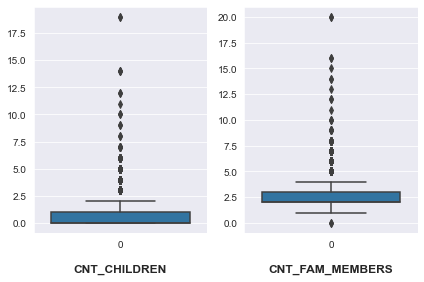

In [42]:
#lets analyse outliers for CNT_CHILDREN and CNT_FAM_MEMBERS
getBoxPlots(2,1,application_data_df,['CNT_CHILDREN','CNT_FAM_MEMBERS'],['CNT_CHILDREN', 'CNT_FAM_MEMBERS'],rotation = 0)


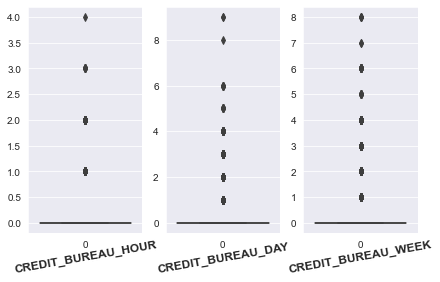

In [43]:
#lets analyse outliers for AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK
getBoxPlots(3,1,application_data_df,['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK'
                                    ,'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],
            ['CREDIT_BUREAU_HOUR','CREDIT_BUREAU_DAY','CREDIT_BUREAU_WEEK'
                                    ,'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],rotation = 10)



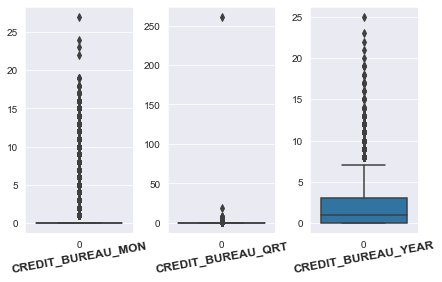

In [44]:
#lets analyse outliers for AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK
getBoxPlots(3,1,application_data_df,['AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],
            ['CREDIT_BUREAU_MON','CREDIT_BUREAU_QRT','CREDIT_BUREAU_YEAR'],rotation = 10)


######  Lets find distribution of various categories that applied for loan
######  occupation type, organization type, income grp level, cnt_family_members 

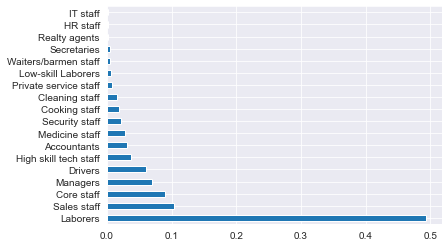

In [45]:
#occupation type
application_data_df.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

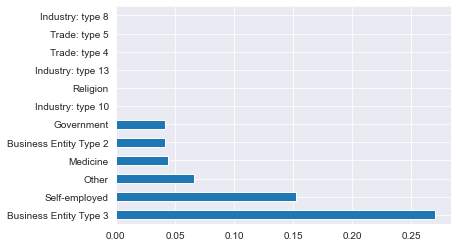

In [46]:
#organization type
top6 = application_data_df.ORGANIZATION_TYPE.value_counts(normalize=True).head(6)
bottom6 = application_data_df.ORGANIZATION_TYPE.value_counts(normalize=True).tail(6)
df = pd.concat([top6, bottom6])
df.plot.barh()
plt.show()

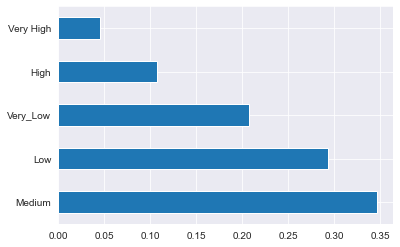

In [47]:
#income group
application_data_df.INCOME_GROUP.value_counts(normalize=True).plot.barh()
plt.show()

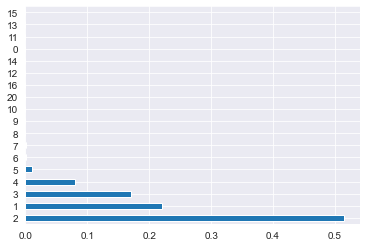

In [48]:
# number of family members
application_data_df.CNT_FAM_MEMBERS.value_counts(normalize=True).plot.barh()
plt.show()


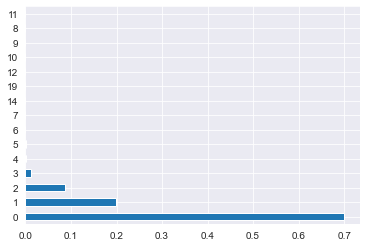

In [49]:
# number of children
application_data_df.CNT_CHILDREN.value_counts(normalize=True).plot.barh()
plt.show()


##### Checking Imbalance

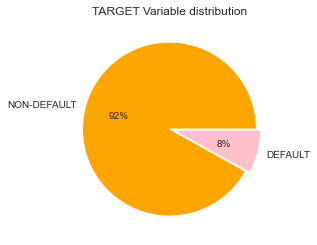

In [50]:
plt.pie(application_data_df['TARGET'].value_counts(),autopct='%1.0f%%',labels=['NON-DEFAULT','DEFAULT'], 
                                               explode=(0,0.05),colors = ['Orange','Pink'])
plt.title('TARGET Variable distribution')
plt.show()

###### Divide the dataset into two , one for those who default and other for those who dont

In [51]:
# Dividing the original dataset into two  dataframes based the target value
defaulter_df = application_data_df.loc[application_data_df.TARGET == 1]
non_defaulter_df = application_data_df.loc[application_data_df.TARGET == 0]

##### Lets perform univariate categorical analysis for target variable and compare them. We will compare on
###### 1. Gender 
###### 2. Income Group 
###### 3. Loan Type
###### 4. Family Status
###### 5. Age group 
###### 6. Work experience group
###### 7. If Client owns a car
###### 8. If client owns a house or flat
###### 9. Education Level 
###### 10. Housing Type
###### 11. Who Accompanied the client 


In [52]:
#Lets create a common function to plot pie graphs for default and non default side by side 


def getPiePlots(ncols, nrows, dataframe, column, titles, rotation):
    fig, ax = plt.subplots(1,2, figsize=(12, 5), tight_layout=True)
    colors = sns.color_palette('pastel')
    piechart1 = dataframe[0][column].value_counts()
    piechart2 = dataframe[1][column].value_counts()
    pie0 = ax[0].pie(piechart1,autopct='%1.0f%%',
             labels = piechart1.index.tolist(),colors=colors)
    ax[0].set_title(titles[0], weight='bold')
    pie1 = ax[1].pie(piechart2,autopct='%1.0f%%',
             labels = piechart2.index.tolist(),colors=colors)
    ax[1].set_title(titles[1], weight='bold')
    plt.show()
    

   



In [53]:
# function to count plot for categorical variables
def getCountPlots(columnName, titles):

    sns.set_style('whitegrid')
    sns.color_palette("tab10")
    colors = sns.color_palette('pastel')
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=columnName, data=defaulter_df,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(titles[0],weight='bold')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(defaulter_df))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=columnName, data=non_defaulter_df,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(titles[1],weight='bold')    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(non_defaulter_df))*100), (p.get_x()+0.1, p.get_height()+50))

    ax1.tick_params(axis='both', which='major', labelsize=15)
    ax2.tick_params(axis='both', which='major', labelsize=15)
    plt.show()
    

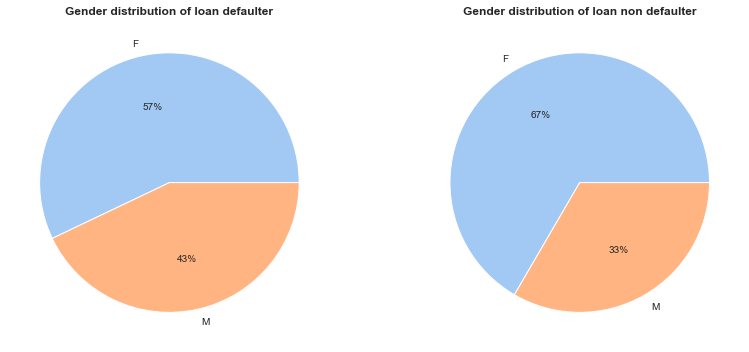

In [54]:
getPiePlots(2,1,[defaulter_df,non_defaulter_df],'CODE_GENDER',['Gender distribution of loan defaulter','Gender distribution of loan non defaulter'],rotation = 0)


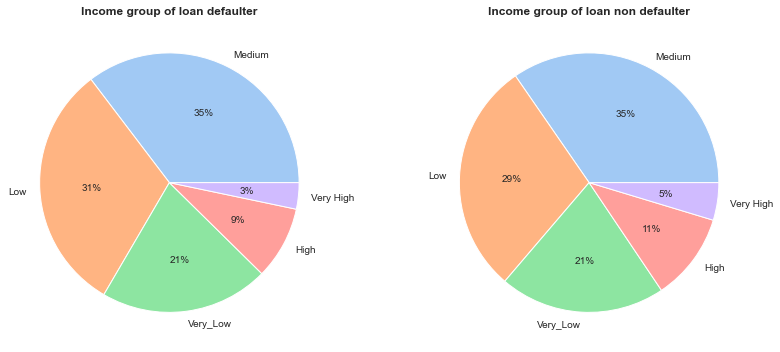

In [55]:
getPiePlots(2,1,[defaulter_df,non_defaulter_df],'INCOME_GROUP',['Income group of loan defaulter','Income group of loan non defaulter'],rotation = 0)


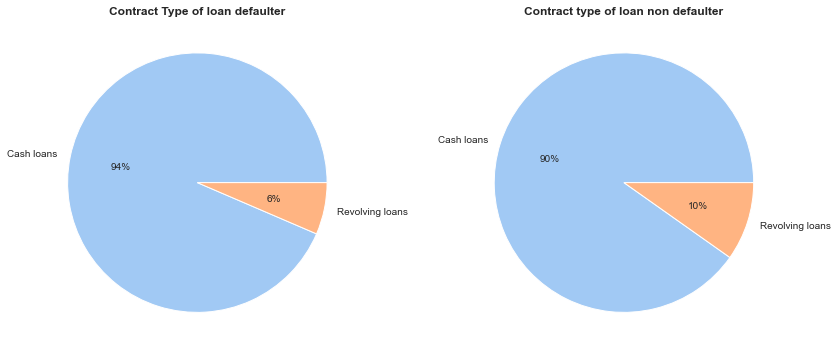

In [56]:
getPiePlots(2,1,[defaulter_df,non_defaulter_df],'NAME_CONTRACT_TYPE',['Contract Type of loan defaulter','Contract type of loan non defaulter'],rotation = 0)


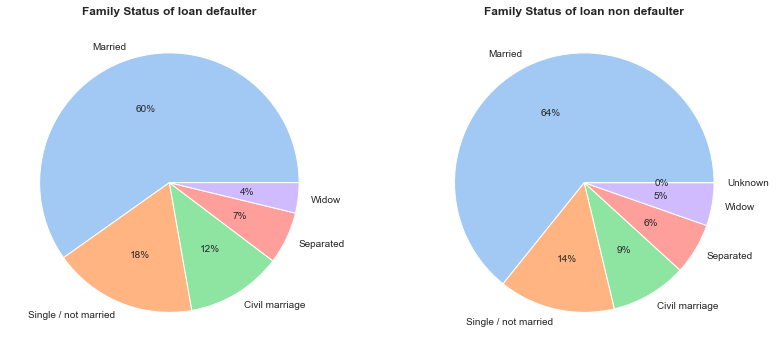

In [57]:
getPiePlots(2,1,[defaulter_df,non_defaulter_df],'NAME_FAMILY_STATUS',['Family Status of loan defaulter','Family Status of loan non defaulter'],rotation = 0)


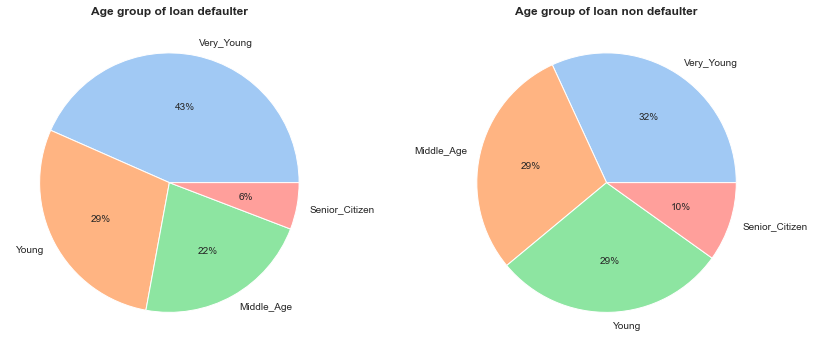

In [58]:
#AGE_GROUP_Category, WORK_YEARS_Category
getPiePlots(2,1,[defaulter_df,non_defaulter_df],'AGE_GROUP_Category',['Age group of loan defaulter','Age group of loan non defaulter'],rotation = 0)


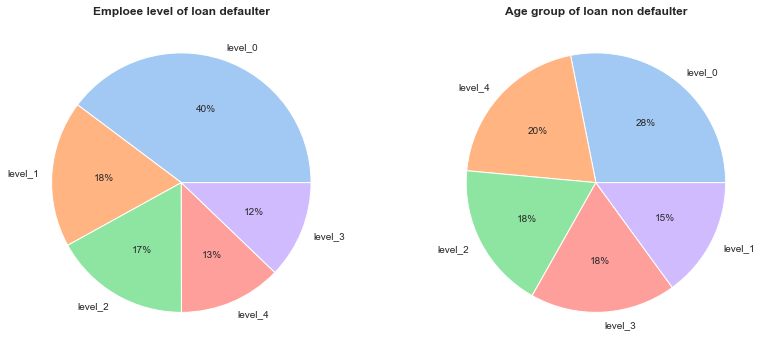

In [59]:
getPiePlots(2,1,[defaulter_df,non_defaulter_df],'WORK_YEARS_Category',['Emploee level of loan defaulter','Age group of loan non defaulter'],rotation = 0)


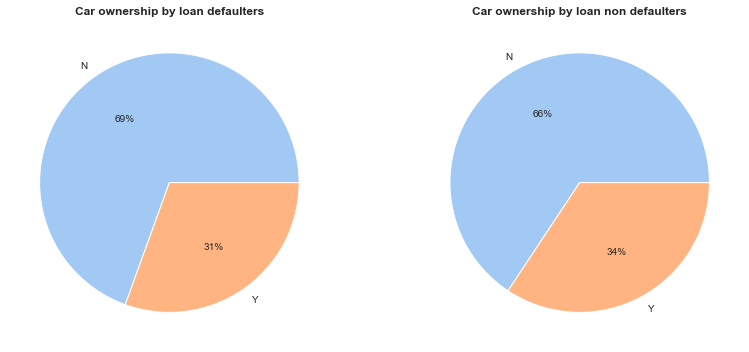

In [60]:
getPiePlots(2,1,[defaulter_df,non_defaulter_df],'FLAG_OWN_CAR',['Car ownership by loan defaulters','Car ownership by loan non defaulters'],rotation = 0)


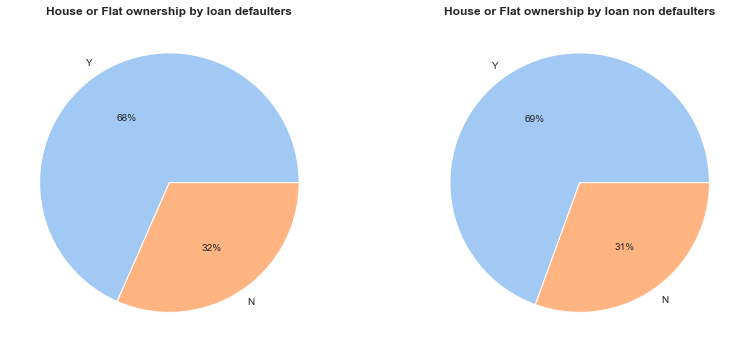

In [61]:
getPiePlots(2,1,[defaulter_df,non_defaulter_df],'FLAG_OWN_REALTY',['House or Flat ownership by loan defaulters','House or Flat ownership by loan non defaulters'],rotation = 0)


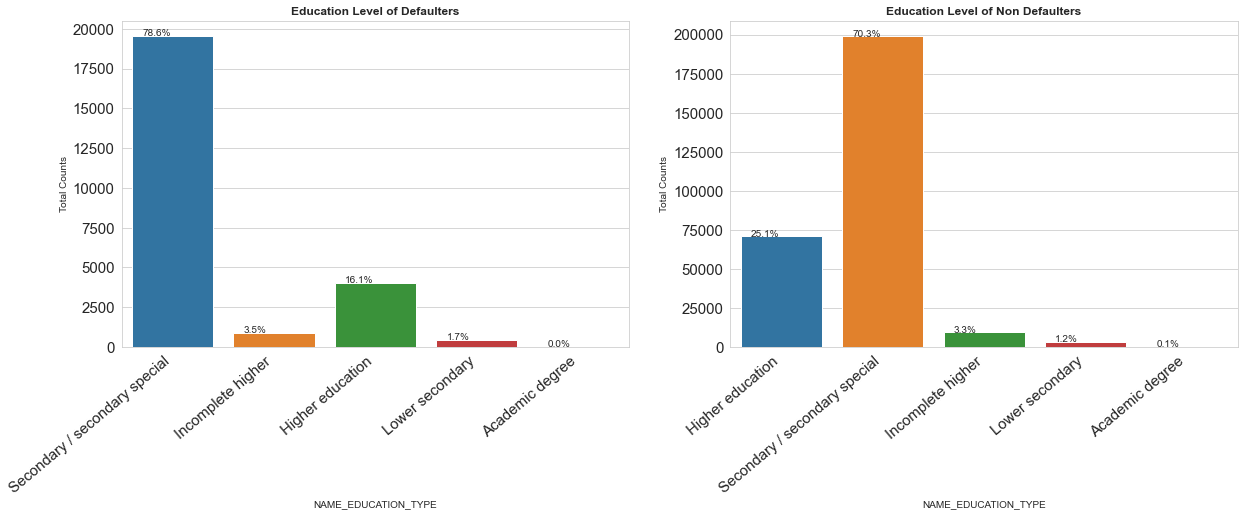

In [62]:
getCountPlots('NAME_EDUCATION_TYPE',['Education Level of Defaulters','Education Level of Non Defaulters'])

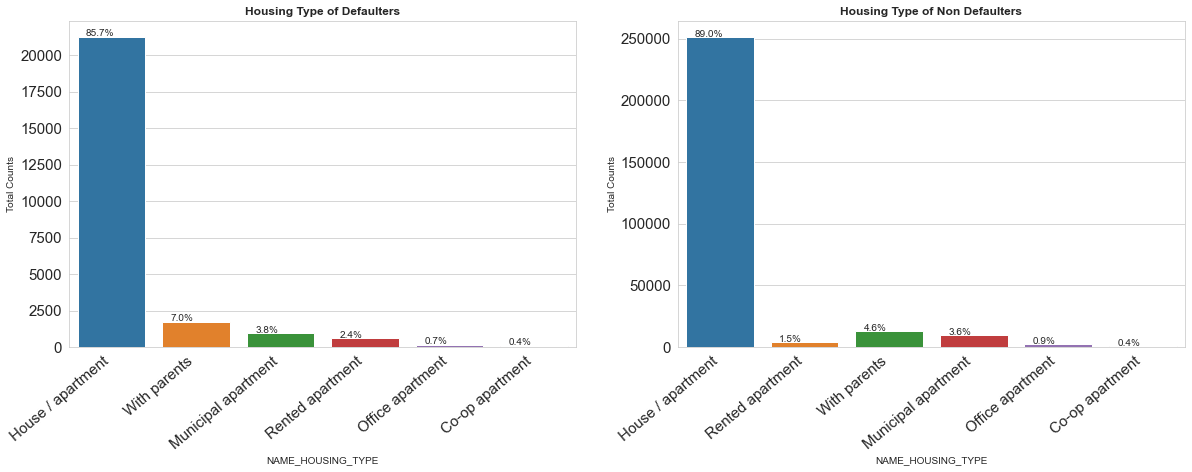

In [63]:
getCountPlots('NAME_HOUSING_TYPE',['Housing Type of Defaulters','Housing Type of Non Defaulters'])

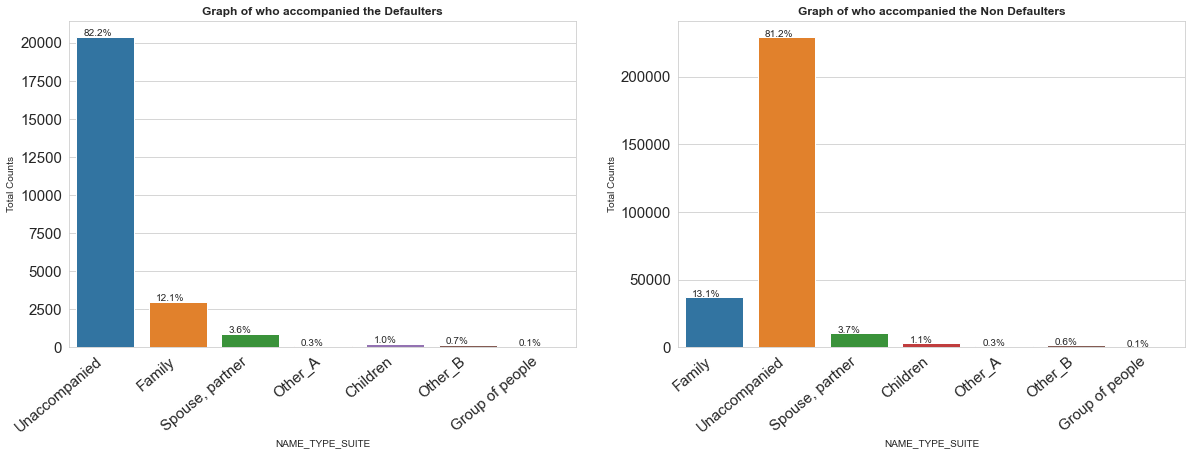

In [64]:
getCountPlots('NAME_TYPE_SUITE',['Graph of who accompanied the Defaulters','Graph of who accompanied the Non Defaulters'])

###### Univariate Analysis of Numerical Variables on the basis of 'Target' Variable. We will compare on
###### 1. AMT_ANNUITY 
###### 2. AMT_INCOME_TOTAL
###### 3. AMT_CREDIT
###### 4. AMT_GOODS_PRICE
###### 5. CNT_FAM_MEMBERS
###### 6. EXT_SOURCE = EXT_SOURCE_2+EXT_SOURCE_3


In [65]:
import matplotlib.ticker as ticker
def univariate_numerical(columName,title,xticksInMillions,yticksInMillions,yinLog,hue =None):
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,10))
    ax[0].set_title(f'Distribution Plot of {title} for defaulters ', weight='bold', fontsize=15)
    sns.histplot(defaulter_df[~defaulter_df[columName].isna()][columName],ax=ax[0], color="#4CB391")
    ax[0].set_ylabel(ylabel = 'count',weight='bold')
    if(xticksInMillions):
        scale_x = 1e6
        ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
        ax[0].xaxis.set_major_formatter(ticks_x)
        ax[0].set_xlabel(f'{title} val in millions', weight='bold')
        
   # plt.yscale('log')
    ax[1].set_title(f'{title} Box Plot of defaulters ', weight='bold',fontsize=15)
    sns.boxplot(data =defaulter_df, y=columName,ax=ax[1],orient='v')
    if(xticksInMillions):
        scale_x = 1e6
        ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
        ax[1].xaxis.set_major_formatter(ticks_x)
        ax[1].set_xlabel(f'{title} val in millions', weight='bold')
    if(yticksInMillions):
        scale_y = 1e6
        ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
        ax[1].yaxis.set_major_formatter(ticks_y)
        ax[1].set_ylabel(f'{title} val in millions', weight='bold')
    elif(yinLog):
        plt.yscale('log')
        
        
    
   # plt.yscale('log')
    plt.show()
    
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
    ax[0].set_title(f'Distribution Plot of {title} for non defaulters ', weight='bold',fontsize=15)
    sns.histplot(non_defaulter_df[~non_defaulter_df[columName].isna()][columName],ax=ax[0], color="#4CB391")
    ax[0].set_ylabel(ylabel = 'count',weight='bold')
    if(xticksInMillions):
        scale_x = 1e6
        ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
        ax[0].xaxis.set_major_formatter(ticks_x)
        ax[0].set_xlabel(f'{title} val in millions', weight='bold')
    #plt.yscale('log')
    ax[1].set_title(f' {title} Box Plot of non defaulters ',weight='bold',fontsize=15)
    sns.boxplot(data =non_defaulter_df, y=columName,ax=ax[1],orient='v')
    if(yticksInMillions):
        scale_y = 1e6
        ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
        ax[1].yaxis.set_major_formatter(ticks_y)
        ax[1].set_ylabel(f'{title} val in millions', weight='bold')
    elif(yinLog):
        plt.yscale('log')
    plt.show()

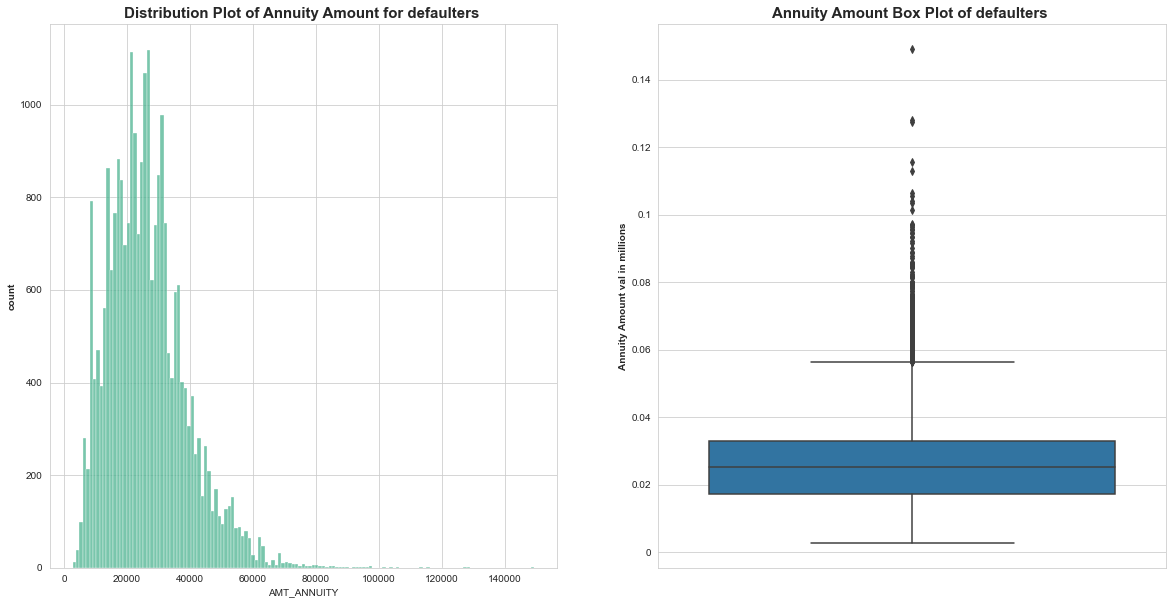

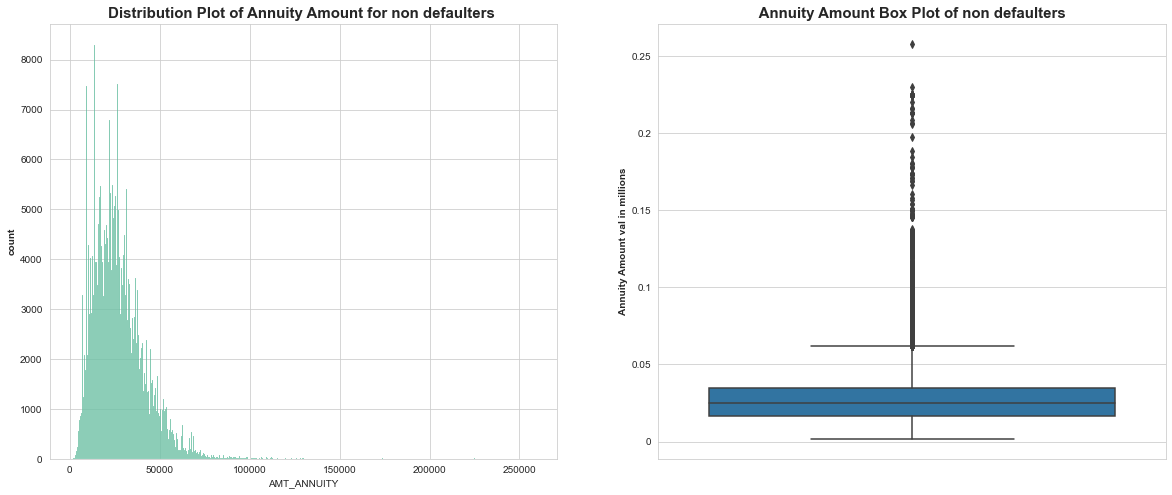

In [66]:
univariate_numerical('AMT_ANNUITY', 'Annuity Amount',False, True, False)


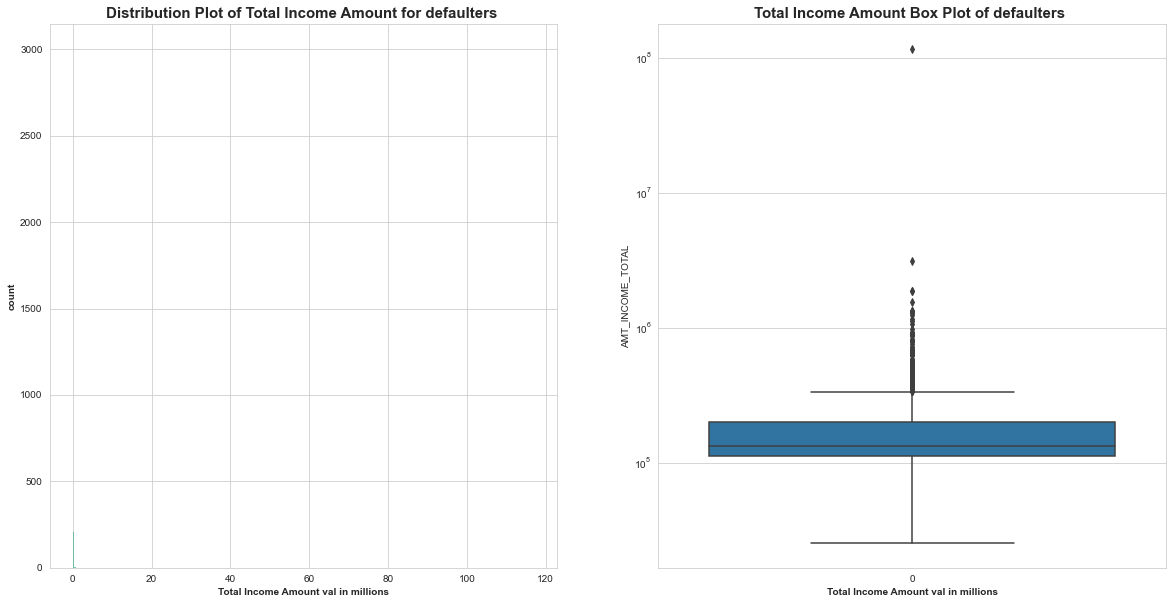

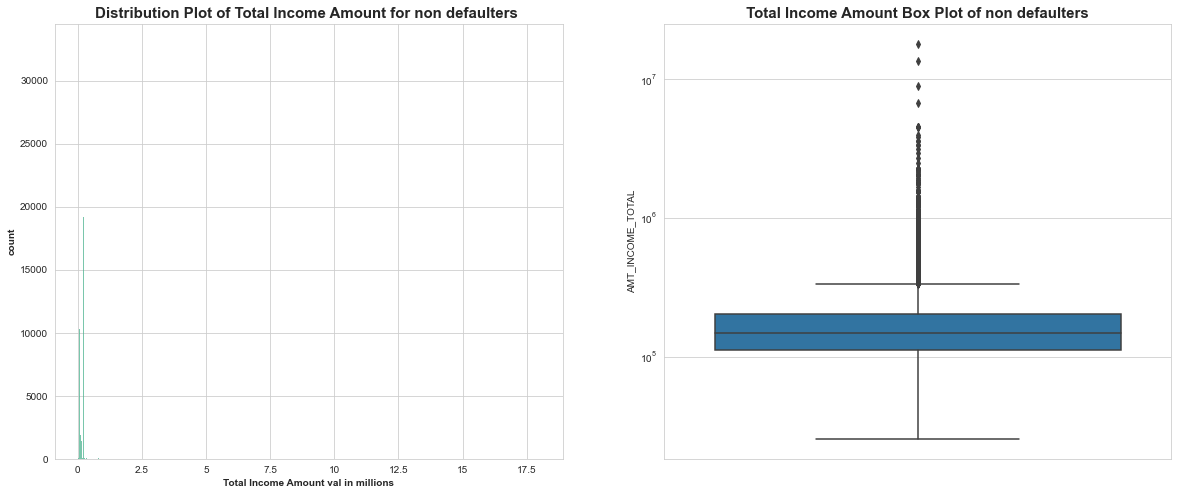

In [67]:
univariate_numerical('AMT_INCOME_TOTAL', 'Total Income Amount', True,False, True)

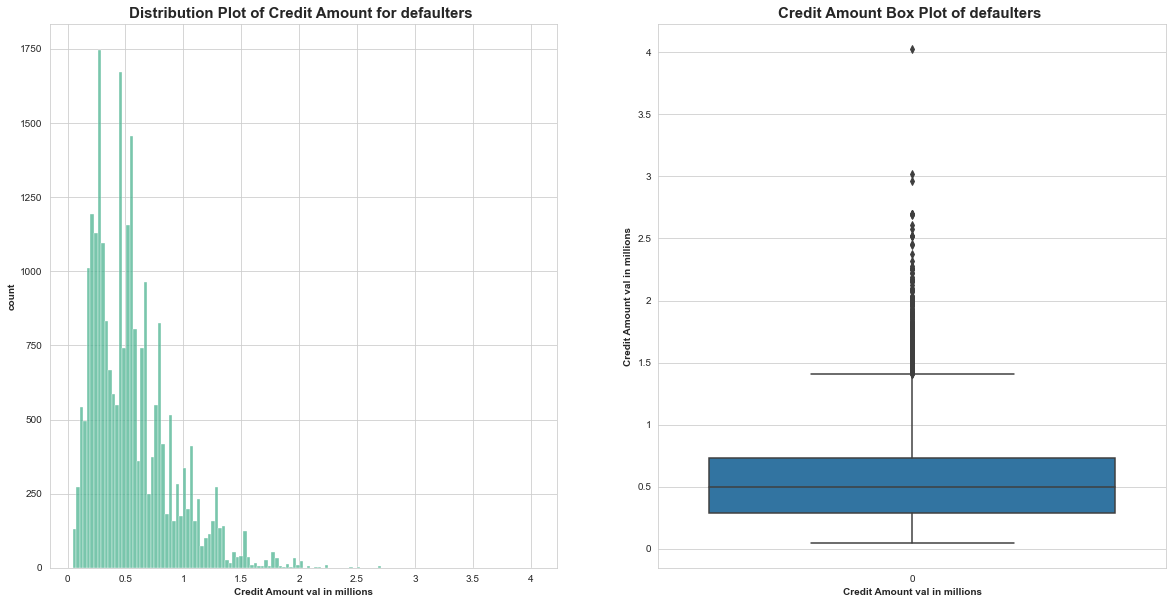

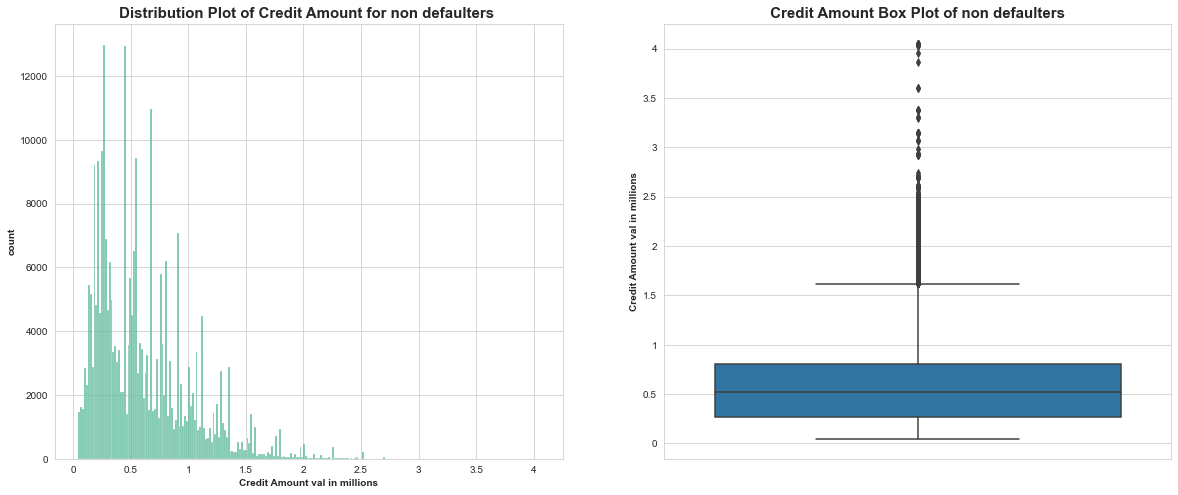

In [68]:
univariate_numerical('AMT_CREDIT', 'Credit Amount', True,True, False)

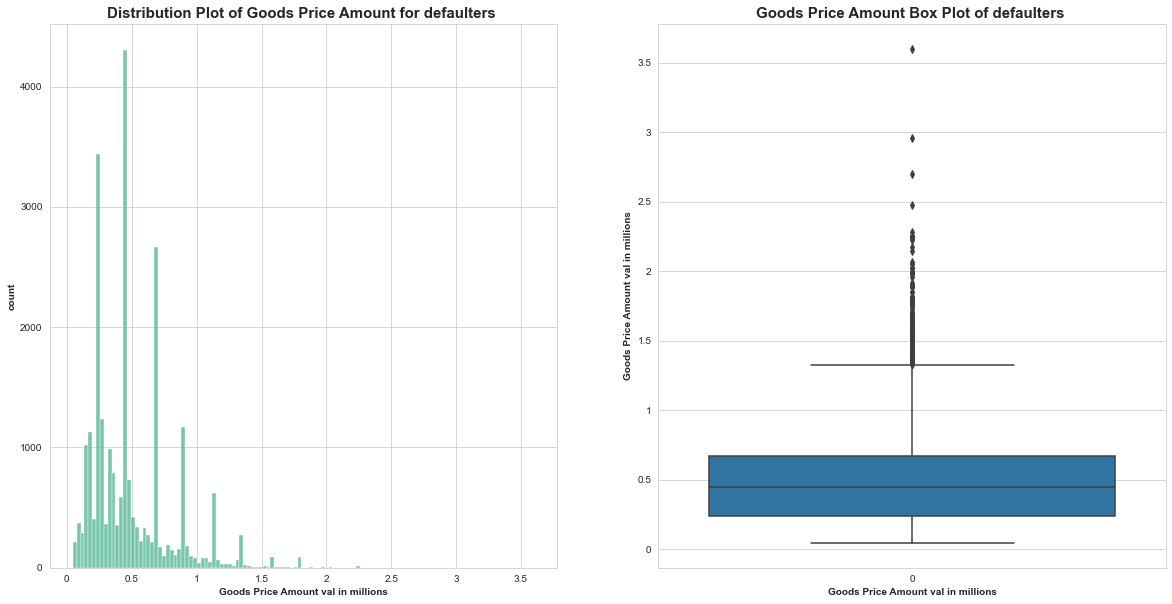

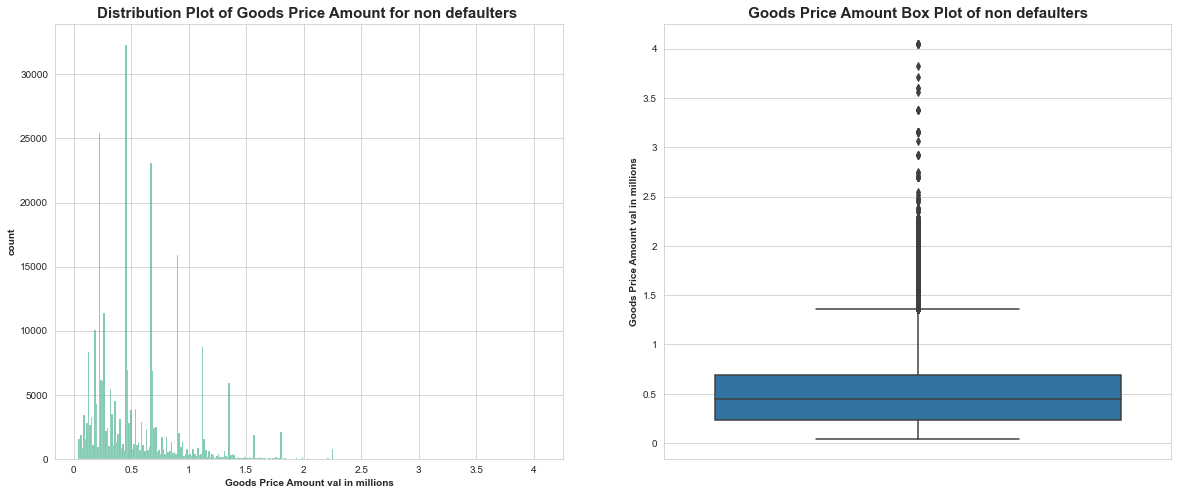

In [69]:
univariate_numerical('AMT_GOODS_PRICE', 'Goods Price Amount', True,True, False)

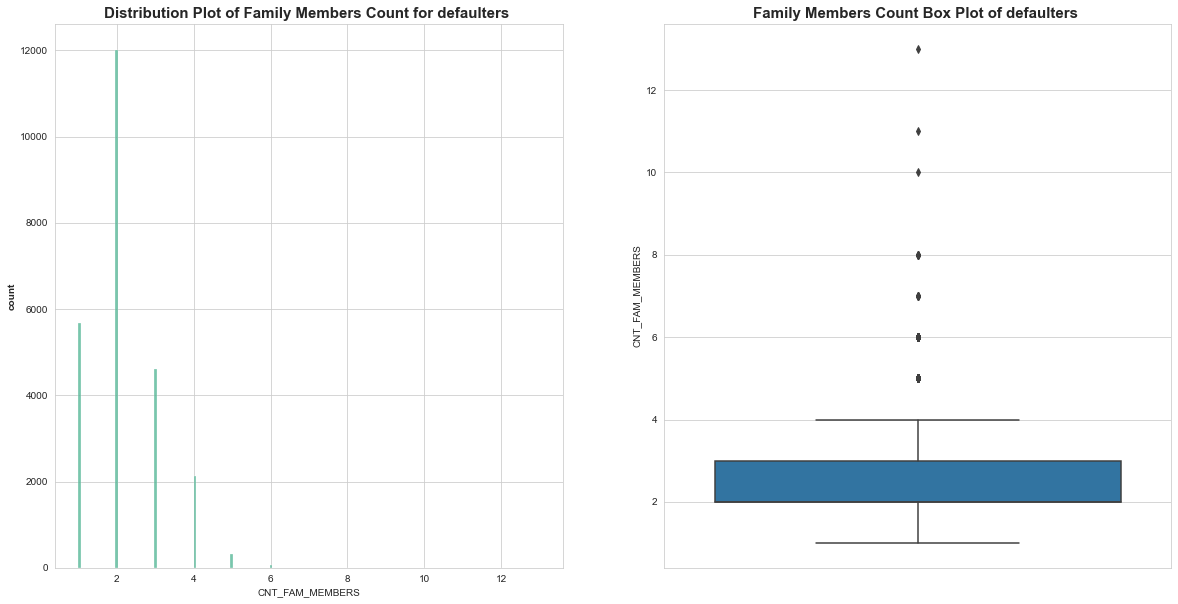

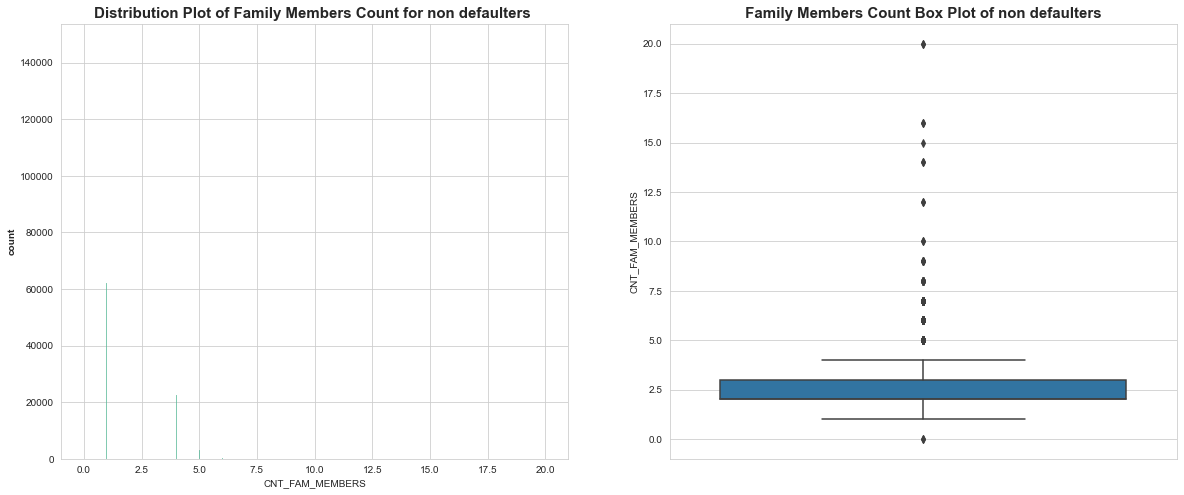

In [70]:
univariate_numerical('CNT_FAM_MEMBERS', 'Family Members Count', False,False, False)

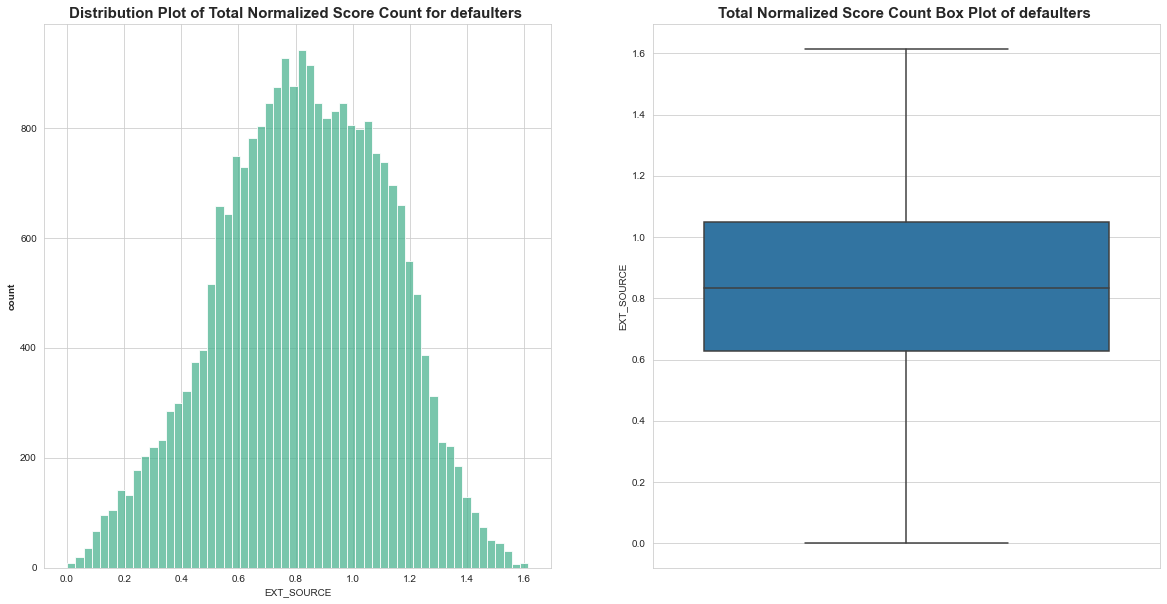

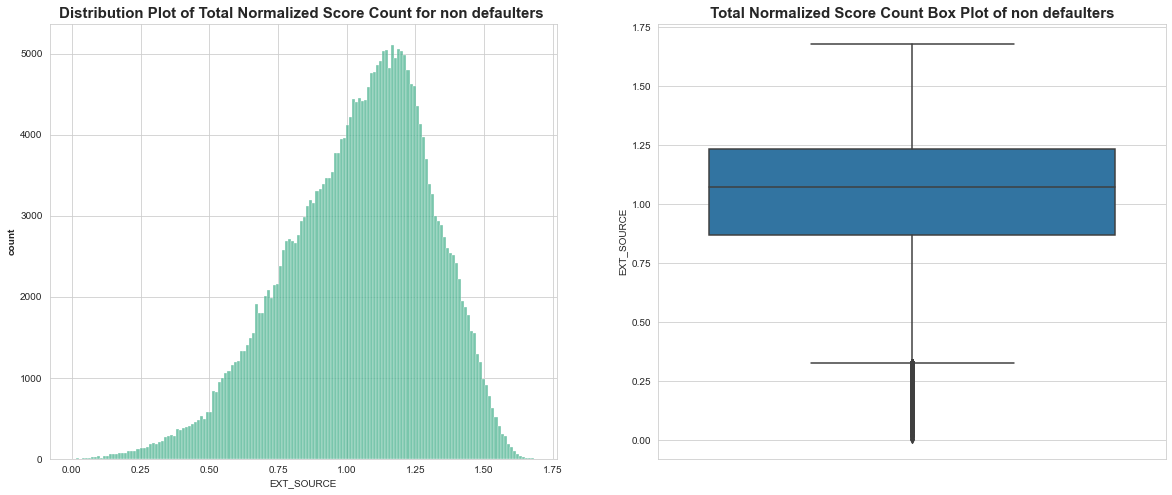

In [71]:
univariate_numerical('EXT_SOURCE', 'Total Normalized Score Count', False,False, False)

#### Bivariate Analysis 


###### Bivariate Analysis -> Categorical vs Numerical Variables
######  NAME_EDUCATION_TYPE -> AMT_CREDIT, hue->NAME_FAMILY_STATUS
######  Education Level vs Income Amount -> NAME_FAMILY_STATUS
######  Education Level vs Ext Source
######  Income Group -> AMT_CREDIT , hue->Education Level
###### Income Group -> EXT_SOURCE,  hue->Education Level



In [72]:
# For bivariate categorical numerical analysis lets use box plots with Hue so that
# we can bring a third category into picture.

#Lets  define a function which returns two box plots for two same values for two defaulter
# and non defaulter population for ease of comparison

import matplotlib.ticker as ticker
def get_bivariate_cn_boxplots(categorical,numerical,title1,title2,title3,xticksInMillions,yticksInMillions,
                              yinLog,hue):
    
    fig, ax=plt.subplots(nrows =1,ncols=1,figsize=(20,10))
    if(hue is None):
        ax.set_title(f'Boxplot of {title1} vs {title2} for defaulters ', weight='bold', fontsize=15)
    else:
        ax.set_title(f'Boxplot of {title1} vs {title2} across {title3} category for defaulters ', 
                     weight='bold', fontsize=15)
    sns.boxplot(x= categorical, y = numerical,hue = hue,
                data = defaulter_df,ax=ax, palette='rainbow')
    #ax[0].set_ylabel(ylabel = 'count',weight='bold')
    if(xticksInMillions):
        scale_x = 1e6
        ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
        ax.xaxis.set_major_formatter(ticks_x)
        ax.set_xlabel(f'{title1} val in millions', weight='bold')
    if(yticksInMillions):
        scale_y = 1e6
        ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
        ax.yaxis.set_major_formatter(ticks_y)
        ax.set_ylabel(f'{title2} val in millions', weight='bold',)
    elif(yinLog):
        plt.yscale('log')
        # plt.yscale('log')
    plt.show()
    
    fig, ax=plt.subplots(nrows =1,ncols=1,figsize=(20,8))
    if(hue is None):
        ax.set_title(f'Boxplot of {title1} vs {title2} for non defaulters ', weight='bold', fontsize=15)
    else:
        ax.set_title(f'Boxplot of {title1} vs {title2} across {title3} category for non defaulters ', 
                     weight='bold', fontsize=15)
    sns.boxplot(x= categorical, y = numerical,hue = hue,
                data = non_defaulter_df,ax=ax,palette='rainbow')
    #ax[0].set_ylabel(ylabel = 'count',weight='bold')
    if(xticksInMillions):
        scale_x = 1e6
        ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
        ax.xaxis.set_major_formatter(ticks_x)
        ax.set_xlabel(f'{title1} val in millions', weight='bold')
    if(yticksInMillions):
        scale_y = 1e6
        ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
        ax.yaxis.set_major_formatter(ticks_y)
        ax.set_ylabel(f'{title2} val in millions', weight='bold')
    elif(yinLog):
        plt.yscale('log')
        # plt.yscale('log')
    plt.show()
    

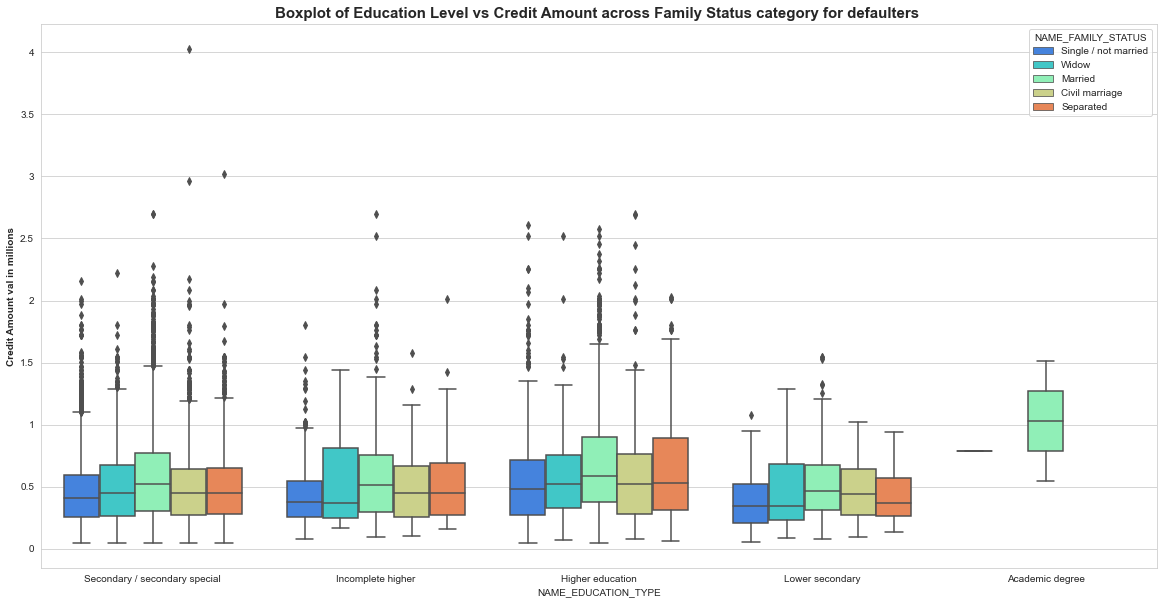

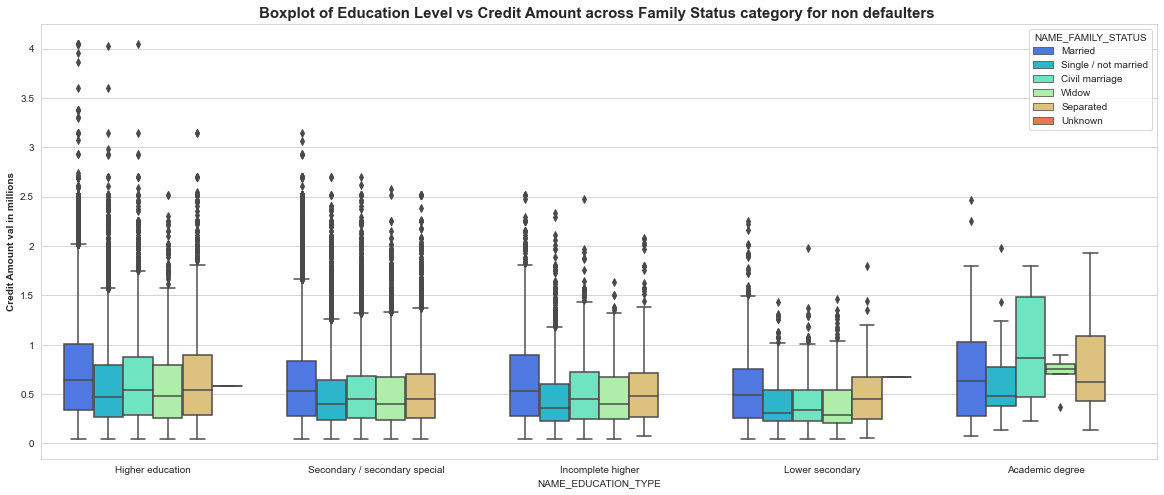

In [73]:
get_bivariate_cn_boxplots('NAME_EDUCATION_TYPE','AMT_CREDIT','Education Level','Credit Amount','Family Status'
                         ,False,True,False,'NAME_FAMILY_STATUS')

Inference on relation between Education Level vs Credit Amount for defaulters and non defaulters 
across varous Family Status Category:
    
    1. We can see that credit amount is higher on the whole or has most outliers mainly in 
    higher educated and Secondary/secondary educated people in both defaulters and non defaulters
    
    2. From our univariate analysis of education levels we saw that Secondary level educated people 
    defaulted most and they have highest outliers in defaulters graph here. 
    so may be credit amount needs to be controlled for them
    
    3.Single/ not married, civil mmarriage and separated family status with academic 
    degree got most credit amount than other family status and education combination
   
    4. In general, people having academic degree have a higher starting range of amount credited
    and they have less presence in defaulters.
    


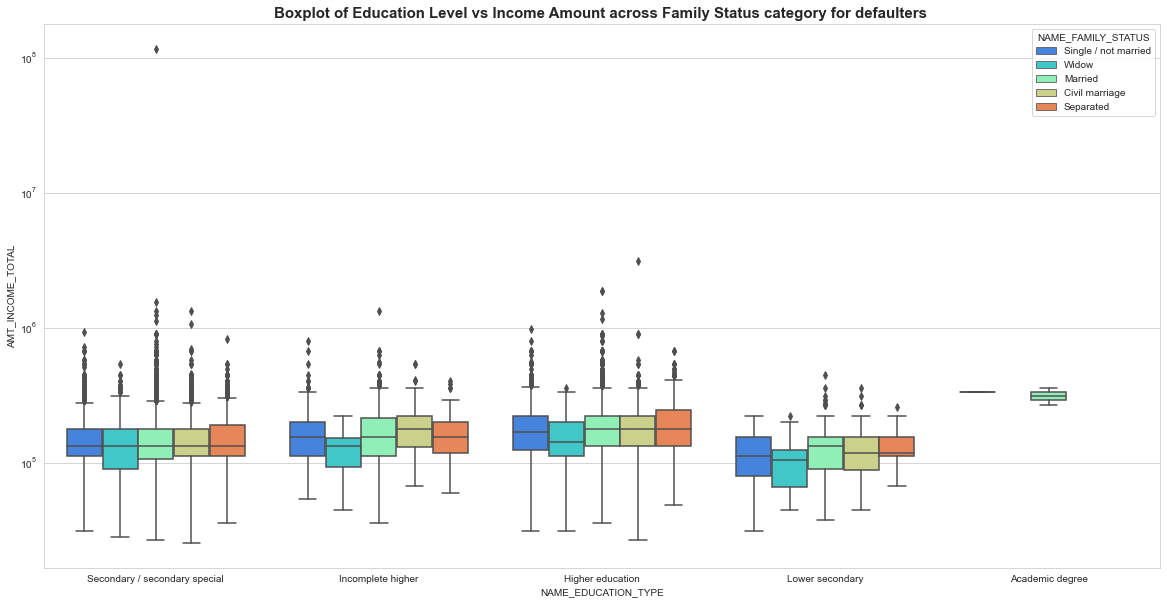

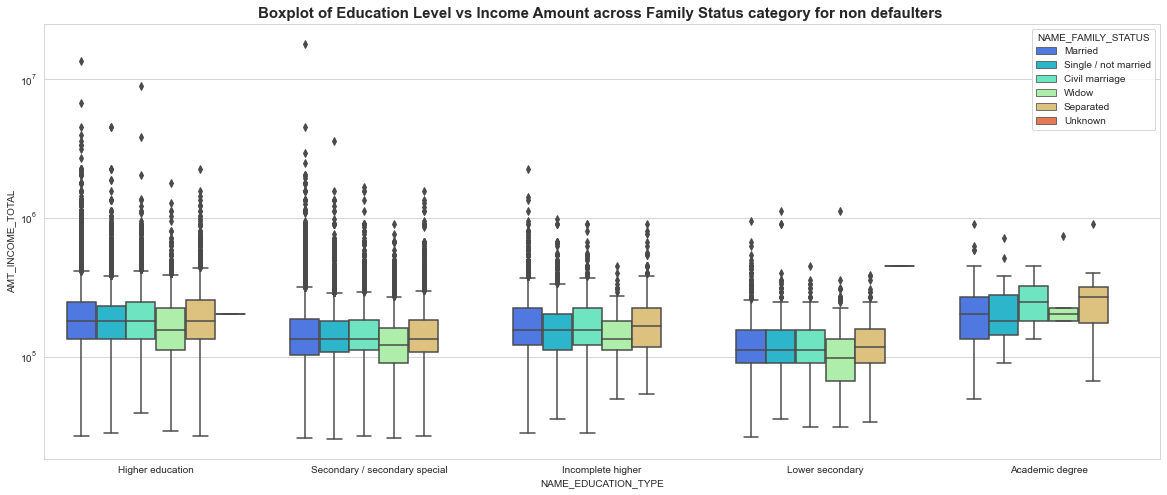

In [74]:
get_bivariate_cn_boxplots('NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL','Education Level','Income Amount','Family Status'
                         ,False,False,True,'NAME_FAMILY_STATUS')

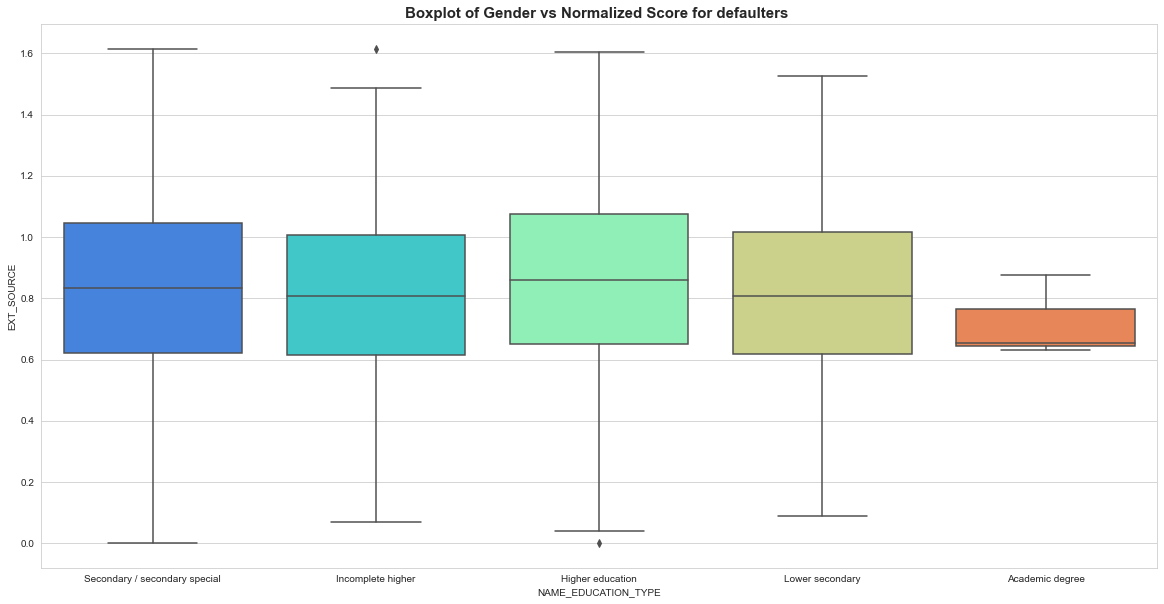

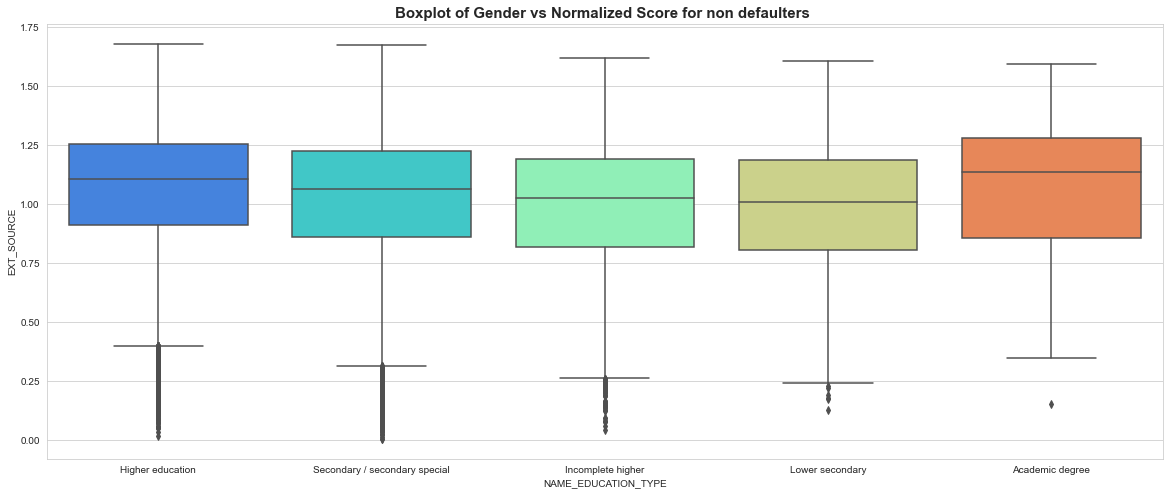

In [75]:
get_bivariate_cn_boxplots('NAME_EDUCATION_TYPE','EXT_SOURCE','Gender','Normalized Score','Gender'
                         ,False,False,False,None)

Inference on relation between Education Level vs Ext Source for defaulters and non defaulters :
    
    1. Irrespective of education type non defaulters have more EXT SCORE which clearly starts above 0.85
    and ends closer to >=1.25 for non defaulters where as EXT SCORE starts near 0.6 for defaulters and
    ends near 1.1 at max.
    2. Also Higher Eucation and Academic Degrees have higher EXT scores and we have seen in our univariate 
    analysis that people with higher EXT score default less.

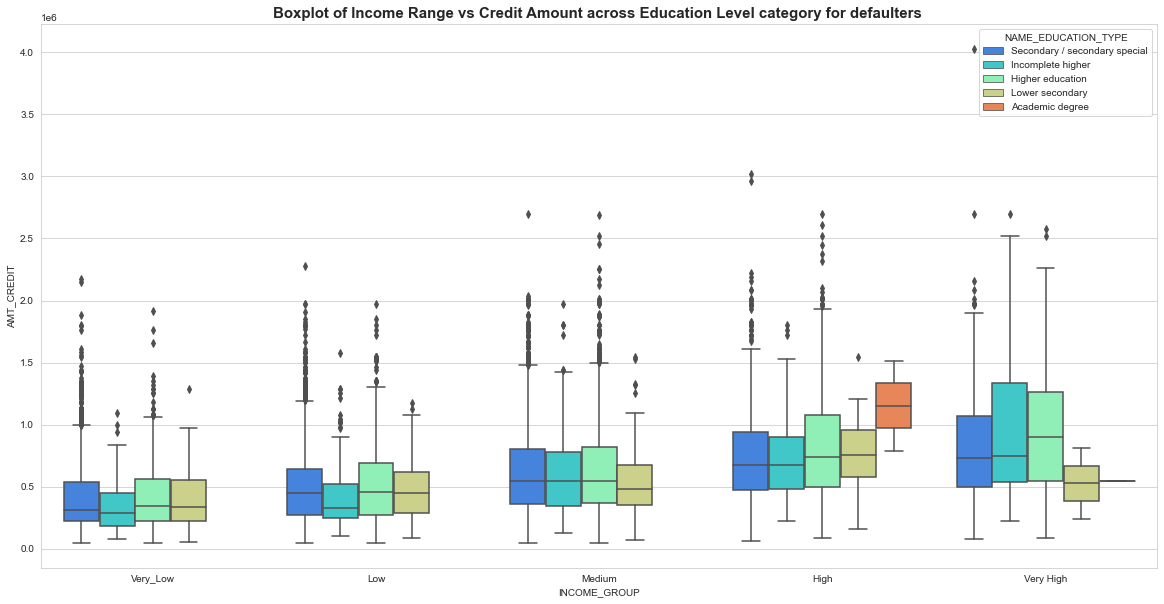

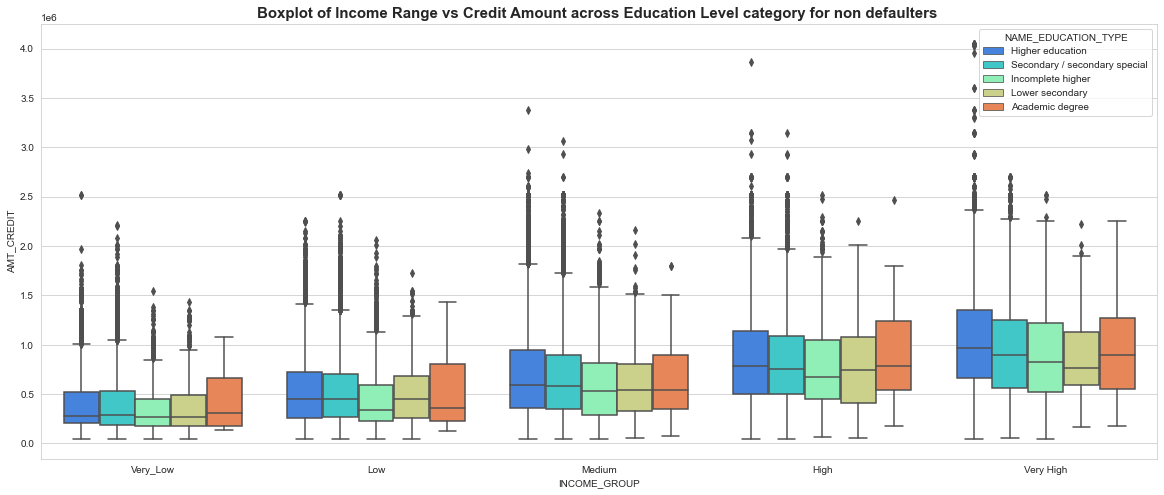

In [76]:
get_bivariate_cn_boxplots('INCOME_GROUP','AMT_CREDIT','Income Range','Credit Amount','Education Level'
                         ,False,False,False,'NAME_EDUCATION_TYPE')

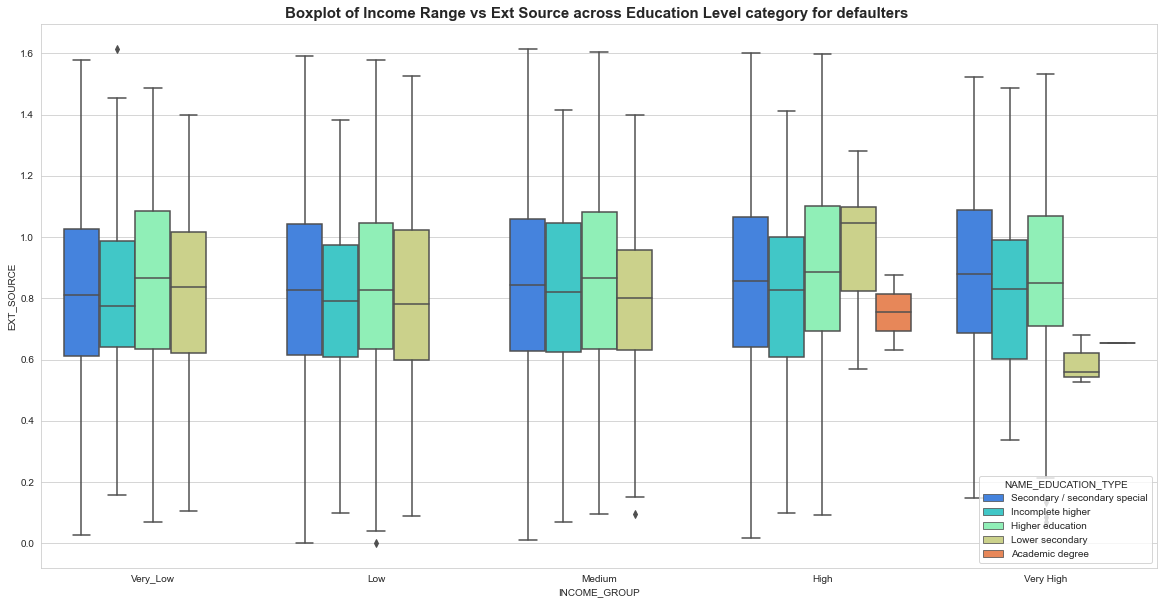

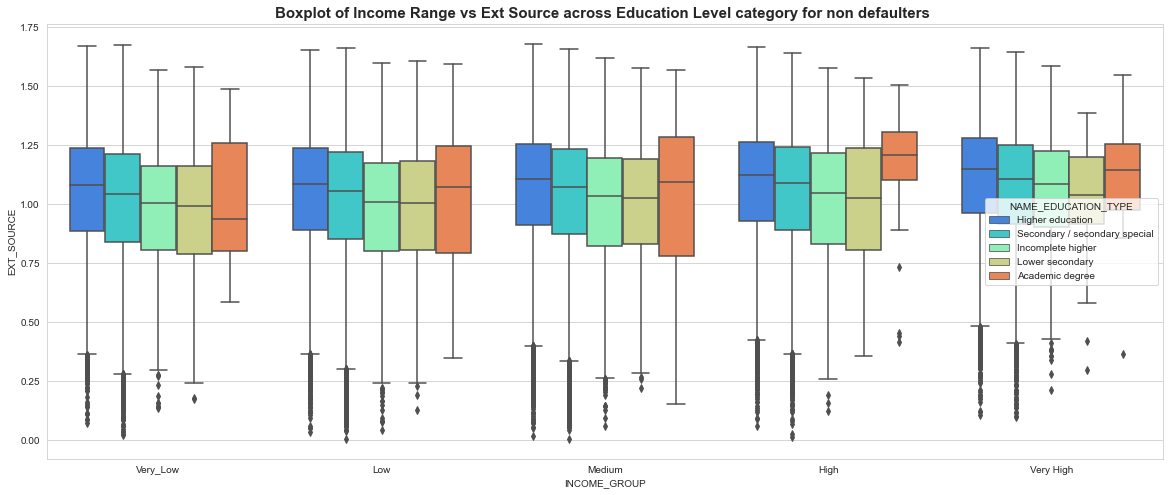

In [77]:
get_bivariate_cn_boxplots('INCOME_GROUP','EXT_SOURCE','Income Range','Ext Source','Education Level'
                         ,False,False,False,'NAME_EDUCATION_TYPE')

###### Bivariate Analysis -> Categorical vs Categorical Variables


In [23]:
# Function for bivariate plots
def bivariate_cc_barplots(df,columnName,title):
    temp = df[columnName].value_counts()    
    # Calculate the percentage of target=1 per category value
    perc = df[[columnName, 'TARGET']].groupby([columnName],as_index=False).mean()
    perc.sort_values(by='TARGET', ascending=False, inplace=True)

  
    fig = make_subplots(rows=1, cols=2,subplot_titles=("Count of "+ title,"% of Loan Payment Defaulters within each category"))


    fig.add_trace(go.Bar(x=temp.index, y=temp.values),row=1,col=1)
    fig.add_trace(go.Bar(x=perc[columnName].to_list(), y=perc['TARGET'].to_list()),row=1, col=2)
    fig['layout']['xaxis']['title']=columnName
    fig['layout']['xaxis2']['title']=columnName
    fig['layout']['yaxis']['title']='Count'
    fig['layout']['yaxis2']['title']='% of Loan Payment Difficulties'
    fig.update_layout(height=600, width=1000, title_text=title, showlegend=False,barmode='relative',
                      paper_bgcolor='white',plot_bgcolor='white',colorway=['cyan','orange'])
    fig.show()

In [79]:
bivariate_cc_barplots(application_data_df ,'INCOME_GROUP','Income range')


In [80]:
bivariate_cc_barplots(application_data_df ,'CODE_GENDER','Gender')


Inference on relation between Gender vs Target Variable :
    
    1. It is a very clear inference that though female application count is more than male population
    it is male population that is facing the most difficulty


In [81]:
bivariate_cc_barplots(application_data_df ,'NAME_CONTRACT_TYPE','Loan Type')


Inference on relation between type of loan vs Target Variable :

   1. Count of cash loans is very high than that of revolving loans
   2. Proprotionately cash loans are the ones with most payment difficulties.

In [82]:
bivariate_cc_barplots(application_data_df ,'NAME_FAMILY_STATUS','Family Status')


Inference on relation between family status vs Target Variable :

1. Widows are the least in count of applications and they defaulted the least
2. Married people applied the most but they are second least defaulting cateogry
3.Civil Marriage category followed by SIngle/Unmarried and Seperated people defaulted the most though 
their applciation count is not the highest

In [83]:
bivariate_cc_barplots(application_data_df ,'AGE_GROUP_Category','Age Group')


Inference on relation between Age group vs Target Variable :

   1. We can see that Very young group applied the most followed by Young amd Middle age group.
   Senior Citizen people applied the least
   2. Proprtonately, we observe that loan default trend follows the application count trend with 
   Senior citizens defaulting the least and Very Young people defaulting the most followed by
   Young and Middle Age group category



In [84]:
bivariate_cc_barplots(application_data_df ,'WORK_YEARS_Category','Work Experience Level')


Inference on relation between work Experience Level vs Target Variable :
    
    1. We can see that lowest experience level applied the most for loan, followed by highest work ex level.
    2. However we see that loan defaulted follows a pattern that loans are defaulted less as years
    of experience increase , that could be because salary increases with work ex level



In [85]:
bivariate_cc_barplots(application_data_df ,'NAME_EDUCATION_TYPE','Education Level')


In [86]:
bivariate_cc_barplots(application_data_df ,'NAME_HOUSING_TYPE','Housing Type')


In [87]:
bivariate_cc_barplots(application_data_df ,'NAME_TYPE_SUITE','Accompaniement Category')


#### Bivariate Numerical Numerical Analysis

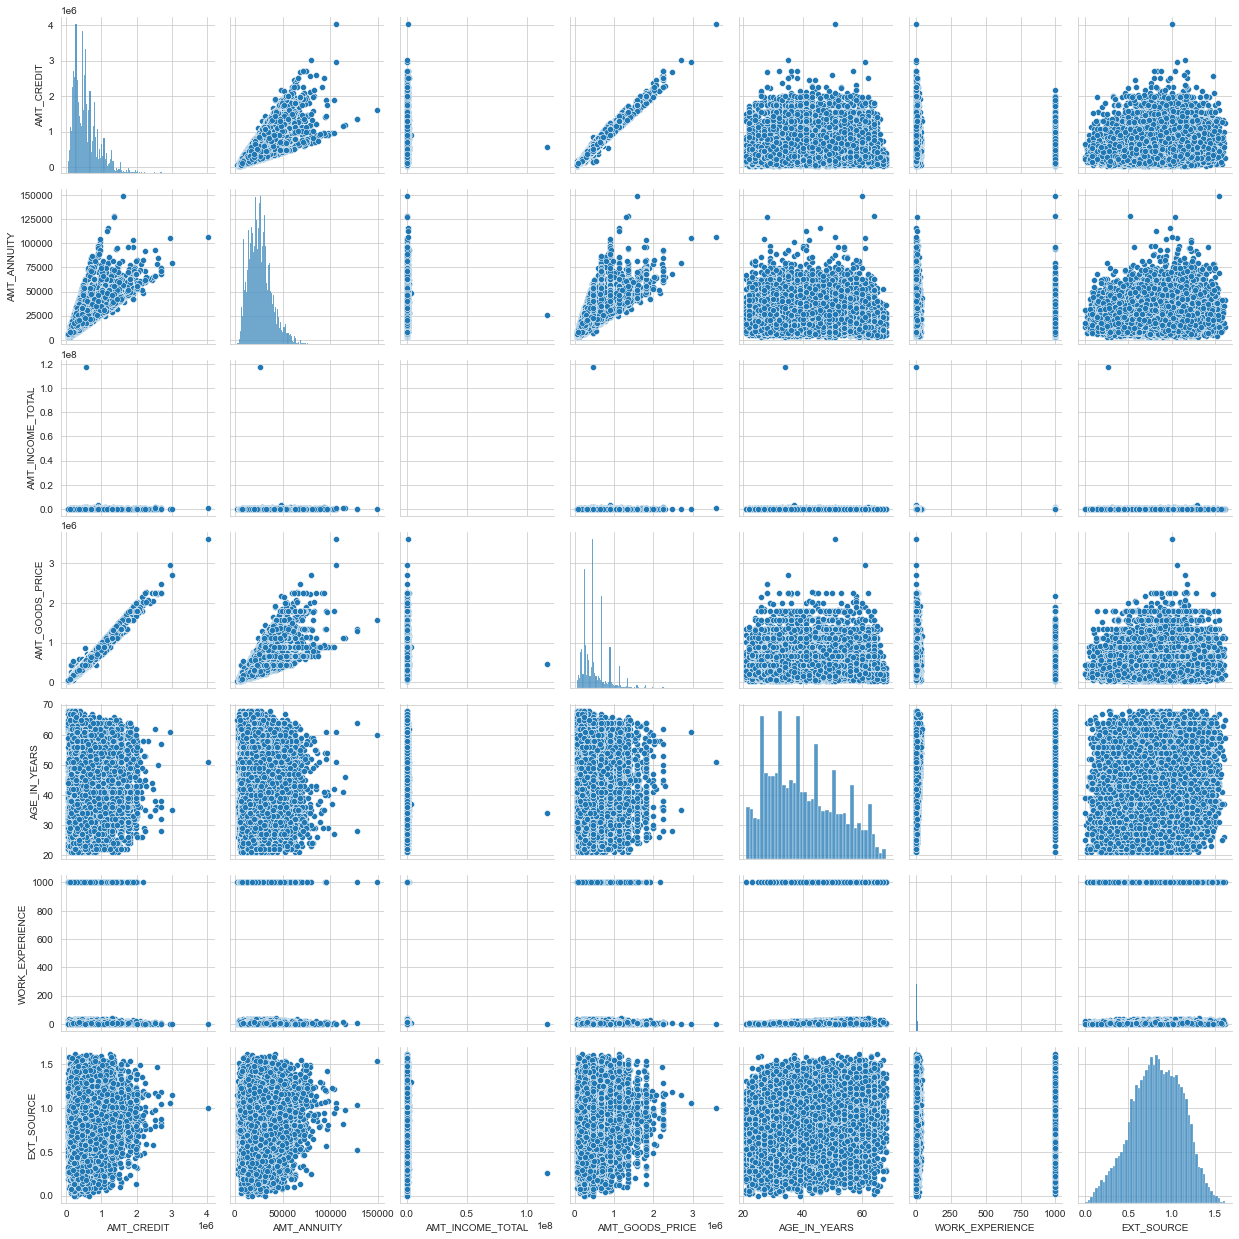

In [88]:
#Pairplot for Target 0 (Loan-Non Payment Difficulties)
target0_columns = defaulter_df[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AGE_IN_YEARS','WORK_EXPERIENCE',
                           'EXT_SOURCE']].fillna(0)
sns.pairplot(target0_columns)

plt.show()

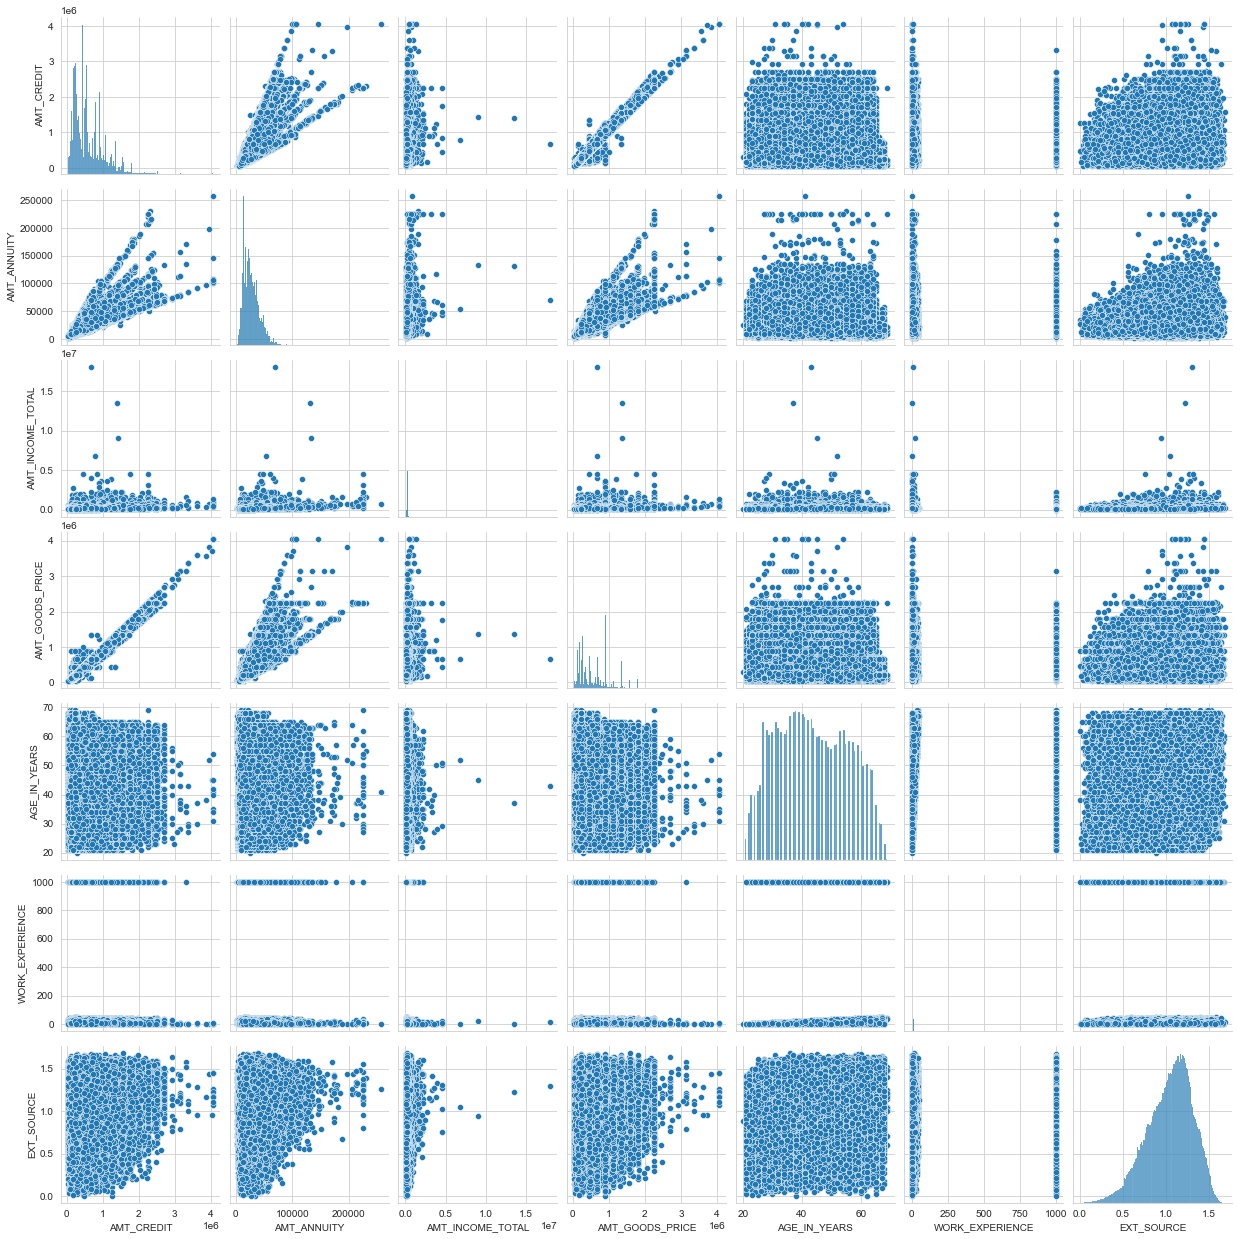

In [89]:
target1_columns = non_defaulter_df[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AGE_IN_YEARS','WORK_EXPERIENCE',
                           'EXT_SOURCE']].fillna(0)
sns.pairplot(target1_columns)

plt.show()

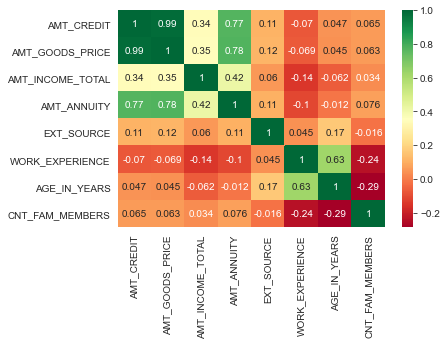

In [90]:
#Heatmap for numerical variable analysis
# Heatmap for Loan- Non Payment Difficulties
sns.heatmap(non_defaulter_df[['AMT_CREDIT','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','EXT_SOURCE','WORK_EXPERIENCE','AGE_IN_YEARS',
         
        'CNT_FAM_MEMBERS' ]].corr(method = 'pearson'),cmap = "RdYlGn", annot=True)
plt.show()

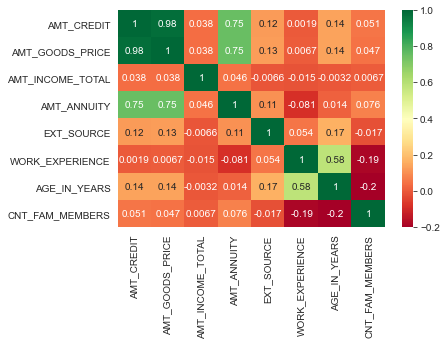

In [91]:
#Heatmap for numerical variable analysis
# Heatmap for Loan-Payment Difficulties
sns.heatmap(defaulter_df[['AMT_CREDIT','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','EXT_SOURCE','WORK_EXPERIENCE','AGE_IN_YEARS',
         
         'CNT_FAM_MEMBERS']].corr(method = 'pearson'),cmap = "RdYlGn", annot=True)
plt.show()

Inference on relation between columns for defaulters and non defaulters:
    1. We can clearly see that almost all the variables have same kind of correltion
    2. Amount income correlation is the only different value because there are some heavy outliers and in general
    income is a little high in defaulters
    

#### Top 10 correlation for loan defaulters:

In [92]:
defaulter_df.drop(['OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','sum_members','CNT_CHILDREN','SOCIAL_CIRCLE_60_DAYS_DEF_PERCENTAGE','SOCIAL_CIRCLE_30_DAYS_DEF_PERCENTAGE',
'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY'
                  ,'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_YEAR',
                  'AMT_REQ_CREDIT_BUREAU_QRT'],inplace=True,axis=1)
correlation=defaulter_df.corr(method = 'pearson')
correlation=correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool))
correlation_df=correlation.unstack().reset_index()
correlation_df.columns = ['Correlation variable 1','Correlation variable 2','CORRELATION']
correlation_df.dropna(subset=['CORRELATION'],inplace=True)
correlation_df['Absolute_Correlation']=correlation_df['CORRELATION'].abs()
correlation_df = correlation_df.sort_values('Absolute_Correlation', ascending=False).head(10)
correlation_df

Correlation variable 1 Correlation variable 2  CORRELATION  \
63         AMT_GOODS_PRICE             AMT_CREDIT     0.982783   
64         AMT_GOODS_PRICE            AMT_ANNUITY     0.752295   
51             AMT_ANNUITY             AMT_CREDIT     0.752195   
90         WORK_EXPERIENCE           AGE_IN_YEARS     0.582443   
102        CNT_FAM_MEMBERS           AGE_IN_YEARS    -0.203403   
103        CNT_FAM_MEMBERS        WORK_EXPERIENCE    -0.186516   
138             EXT_SOURCE           AGE_IN_YEARS     0.165642   
77            AGE_IN_YEARS        AMT_GOODS_PRICE     0.135532   
75            AGE_IN_YEARS             AMT_CREDIT     0.135070   
137             EXT_SOURCE        AMT_GOODS_PRICE     0.129576   

     Absolute_Correlation  
63               0.982783  
64               0.752295  
51               0.752195  
90               0.582443  
102              0.203403  
103              0.186516  
138              0.165642  
77               0.135532  
75               0.135070  
137              0.129576

###  Data Analysis on Previous Application Data

##### Data understanding & Data Types 


In [26]:
# read the application data csv and print top 5 rows
prev_application_data_df=pd.read_csv(r"previous_application.csv")
prev_application_data_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [27]:
#print info of the application data
prev_application_data_df.info()
# from below output we can see that there are 122 columns andthree data types present all
#together and we have to further explore this to convert or change types and fix the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [28]:
#print the shape -> to get number of rows and columns
prev_application_data_df.shape #this dataframe has 307511 rows and 122 columns
print('Number of rows in prev_application_data_df ',prev_application_data_df.shape[0])
print('Number of rows in prev_application_data_df ',prev_application_data_df.shape[1])

Number of rows in prev_application_data_df  1670214
Number of rows in prev_application_data_df  37


#### Data Cleaning and correction

### Data Cleaning: Identify and remove columns that have significant null values


Number of columns with >= 50% null values that need to be dropped are  4


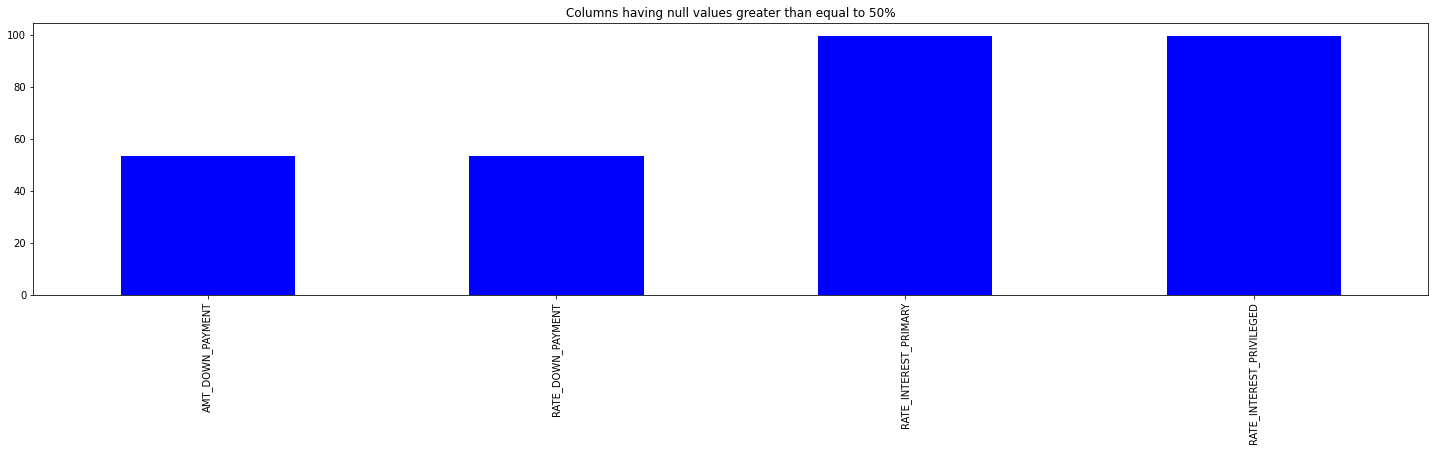

In [29]:
### Identify and remove columns that have significant null values
columns_null_values_pct = prev_application_data_df.isnull().mean() * 100 
columns_gte_50_pct_null_values = columns_null_values_pct[columns_null_values_pct.values >= 50]
print('Number of columns with >= 50% null values that need to be dropped are ', len(columns_gte_50_pct_null_values))
#print('')
plt.figure(figsize=(25,5))
columns_gte_50_pct_null_values.sort_values().plot(kind='bar', color='blue')
plt.title('Columns having null values greater than equal to 50%')
plt.show()


In [30]:
prev_application_data_df.drop(columns_gte_50_pct_null_values.index, inplace=True, axis=1)

In [31]:
#lets observe the numerical colunns
prev_application_data_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670213e+06     1.284699e+06             1.670214e+06   
mean   1.961140e+05     2.278473e+05             1.248418e+01   
std    3.185746e+05     3.153966e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     5.084100e+04             1.000000e+01   
50%    8.054100e+04     1.123200e+05             1.200000e+01   
75%    2.164185e+05     2.340000e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  \
count            1.670214e+06   1.670214e+06      1.670214e+06  1.297984e+06   
mean             9.964675e-01  -8.806797e+02      3.139511e+02  1.605408e+01   
std              5.932963e-02   7.790997e+02      7.127443e+03  1.456729e+01   
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00   
25%              1.000000e+00  -1.300000e+03     -1.000000e+00  6.000000e+00   
50%              1.000000e+00  -5.810000e+02      3.000000e+00  1.200000e+01   
75%              1.000000e+00  -2.800000e+02      8.200000e+01  2.400000e+01   
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count       997149.000000   997149.000000              997149.000000   
mean        342209.855039    13826.269337               33767.774054   
std          88916.115834    72444.869708              106857.034789   
min          -2922.000000    -2892.000000               -2801.000000   
25%         365243.000000    -1628.000000               -1242.000000   
50%         365243.000000     -831.000000                -361.000000   
75%         365243.000000     -411.000000                 129.000000   
max         365243.000000   365243.000000              365243.000000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count  997149.000000     997149.000000              997149.000000  
mean    76582.403064      81992.343838                   0.332570  
std    149647.415123     153303.516729                   0.471134  
min     -2889.000000      -2874.000000                   0.000000  
25%     -1314.000000      -1270.000000                   0.000000  
50%      -537.000000       -499.000000                   0.000000  
75%       -74.000000        -44.000000                   1.000000  
max    365243.000000     365243.000000                   1.000000

In [32]:
# lets observe string columns
prev_application_data_df.select_dtypes(include=[np.object]).head()

NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0     Consumer loans                   SATURDAY                           Y   
1         Cash loans                   THURSDAY                           Y   
2         Cash loans                    TUESDAY                           Y   
3         Cash loans                     MONDAY                           Y   
4         Cash loans                   THURSDAY                           Y   

  NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE  \
0                    XAP             Approved  Cash through the bank   
1                    XNA             Approved                    XNA   
2                    XNA             Approved  Cash through the bank   
3                    XNA             Approved  Cash through the bank   
4                Repairs              Refused  Cash through the bank   

  CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
0                XAP              NaN         Repeater              Mobile   
1                XAP    Unaccompanied         Repeater                 XNA   
2                XAP  Spouse, partner         Repeater                 XNA   
3                XAP              NaN         Repeater                 XNA   
4                 HC              NaN         Repeater                 XNA   

  NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  \
0            POS               XNA             Country-wide   
1           Cash            x-sell           Contact center   
2           Cash            x-sell  Credit and cash offices   
3           Cash            x-sell  Credit and cash offices   
4           Cash           walk-in  Credit and cash offices   

  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         Connectivity           middle  POS mobile with interest  
1                  XNA       low_action          Cash X-Sell: low  
2                  XNA             high         Cash X-Sell: high  
3                  XNA           middle       Cash X-Sell: middle  
4                  XNA             high         Cash Street: high

#### Data Cleaning and Imputation

In [33]:
# From describe we can see that days minimum value has - sign before it which is impossible. 
#Lets correct it
days_columns = [col for col in prev_application_data_df if col.startswith('DAYS')]
prev_application_data_df[days_columns]= abs(prev_application_data_df[days_columns])

In [34]:
#Next lets fix object type columns -> it has XAP or XNA as seen above, lets correct them
prev_application_data_df=prev_application_data_df.replace('XNA', 'Missing')
prev_application_data_df=prev_application_data_df.replace('XAP', 'Missing')


In [35]:
# lets observe null values again for columns which we decided to keep for analysis

prev_application_data_df.columns
 

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

### Univariate Analysis

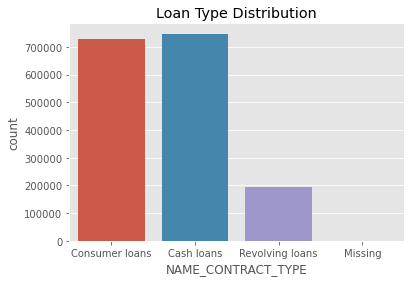

In [114]:
plt.title("Loan Type Distribution")
sns.countplot(prev_application_data_df.NAME_CONTRACT_TYPE)
plt.show()

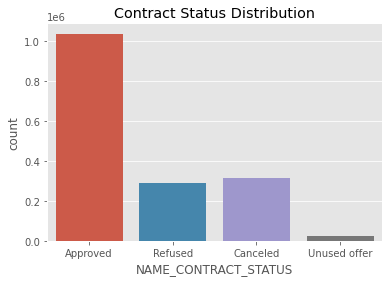

In [116]:
plt.title("Contract Status Distribution")
sns.countplot(prev_application_data_df.NAME_CONTRACT_STATUS)
plt.show()

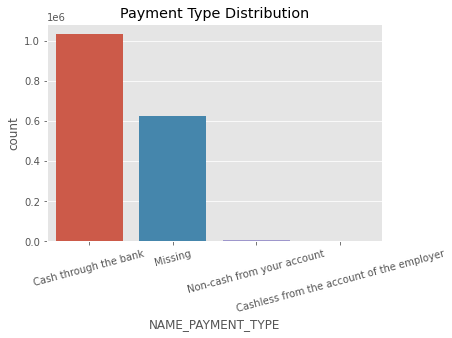

In [125]:
plt.title("Payment Type Distribution")
sns.countplot(prev_application_data_df.NAME_PAYMENT_TYPE)
plt.xticks(rotation=15)
plt.show()

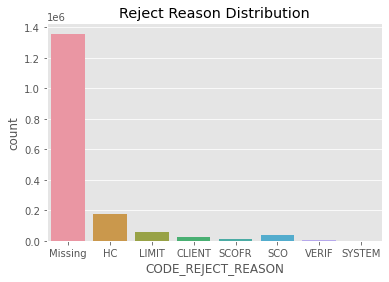

In [126]:
plt.title("Reject Reason Distribution")
sns.countplot(prev_application_data_df.CODE_REJECT_REASON)
plt.show()

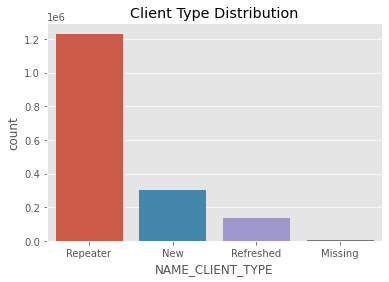

In [128]:
plt.title("Client Type Distribution")
sns.countplot(prev_application_data_df.NAME_CLIENT_TYPE)
plt.show()

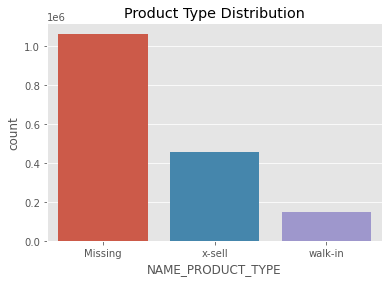

In [129]:
plt.title("Product Type Distribution")
sns.countplot(prev_application_data_df.NAME_PRODUCT_TYPE)
plt.show()

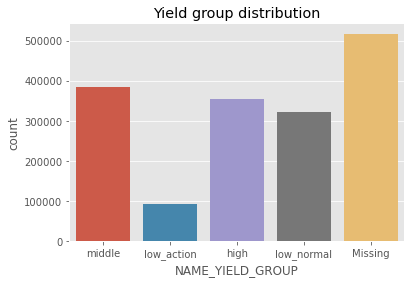

In [130]:
plt.title("Yield group distribution")
sns.countplot(prev_application_data_df.NAME_YIELD_GROUP)
plt.show()

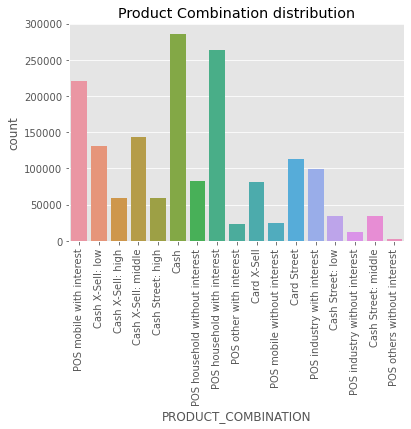

In [132]:
plt.title("Product Combination distribution")
sns.countplot(prev_application_data_df.PRODUCT_COMBINATION)
plt.xticks(rotation=90)
plt.show()

#### Merging two data sets before further analysis

In [133]:
application_data_df_new=application_data_df[['SK_ID_CURR','TARGET']]
merged_application_data_df = application_data_df_new.merge(prev_application_data_df,on='SK_ID_CURR', how='inner')
merged_application_data_df.shape

(1413701, 34)

In [134]:
prev_defaulter_df = merged_application_data_df.loc[merged_application_data_df.TARGET == 1]
prev_non_defaulter_df = merged_application_data_df.loc[merged_application_data_df.TARGET == 0]

#### Univariate continuous analysis

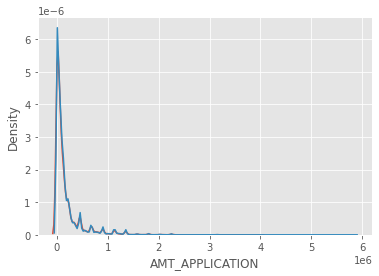

In [147]:
sns.distplot(prev_defaulter_df.AMT_APPLICATION, hist = False, label = 'Defaulter')
sns.distplot(prev_non_defaulter_df.AMT_APPLICATION, hist = False, label = 'Non-Defaulter')
plt.show()

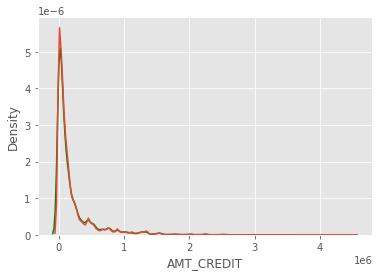

In [148]:
sns.distplot(prev_defaulter_df.AMT_CREDIT, hist = False, label = 'Defaulter', color='green')
sns.distplot(prev_non_defaulter_df.AMT_CREDIT, hist = False, label = 'Non-Defaulter')
plt.show()

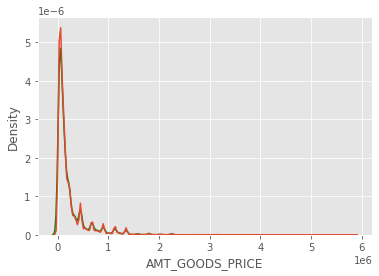

In [139]:
sns.distplot(prev_defaulter_df.AMT_GOODS_PRICE, hist = False, label = 'Defaulter', color='green')
sns.distplot(prev_non_defaulter_df.AMT_GOODS_PRICE, hist = False, label = 'Non-Defaulter')
plt.show()

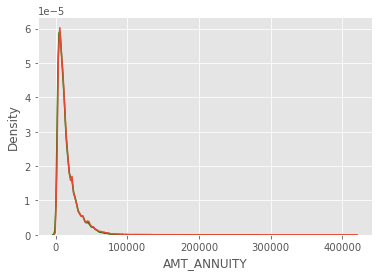

In [140]:
sns.distplot(prev_defaulter_df.AMT_ANNUITY, hist = False, label = 'Defaulter', color='green')
sns.distplot(prev_non_defaulter_df.AMT_ANNUITY, hist = False, label = 'Non-Defaulter')
plt.show()

In [19]:
merged_application_data_df.columns

Index(['SK_ID_CURR', 'TARGET', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE',
       'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [21]:
merged_application_data_df.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL            2
TARGET                               2
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_PRODUCT_TYPE                    3
NAME_CONTRACT_TYPE                   4
NAME_CLIENT_TYPE                     4
NAME_PAYMENT_TYPE                    4
NAME_CONTRACT_STATUS                 4
NAME_YIELD_GROUP                     5
NAME_PORTFOLIO                       5
WEEKDAY_APPR_PROCESS_START           7
NAME_TYPE_SUITE                      7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   8
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
NAME_CASH_LOAN_PURPOSE              24
HOUR_APPR_PROCESS_START             24
NAME_GOODS_CATEGORY                 27
CNT_PAYMENT                         48
SELLERPLACE_AREA                  2077
DAYS_FIRST_DRAWING                2799
DAYS_LAST_DUE_1ST_VERSION         2803
DAYS_TERMINATION                  2809
DAYS_LAST_DUE            

#### Bivariate categorical - categorical analysis

In [36]:
bivariate_cc_barplots(merged_application_data_df,'NAME_PRODUCT_TYPE','Product type distribution')

In [37]:
bivariate_cc_barplots(merged_application_data_df,'NAME_CONTRACT_TYPE','Contract type distribution')

Inference: Revolving loans are defaulted more than other types though revolving loan applications are least
    in previous applications

In [38]:
bivariate_cc_barplots(merged_application_data_df,'NAME_CLIENT_TYPE','Client type distribution')

Inference:
    we can see that repeaters are more for loan application but there is negligible difference
    between new applicants and repeaters wrt defaulr ratio.

In [39]:
bivariate_cc_barplots(merged_application_data_df,'NAME_PAYMENT_TYPE','Client type distribution')

In [41]:
bivariate_cc_barplots(merged_application_data_df,'NAME_CONTRACT_STATUS','Contract Status distribution')

In [42]:
bivariate_cc_barplots(merged_application_data_df,'NAME_YIELD_GROUP','Application Yield Group distribution')

In [43]:
bivariate_cc_barplots(merged_application_data_df,'NAME_PORTFOLIO','Loan Portfolio distribution')

In [ ]:
Inferece:
    Poeple who applied for Cards have defaulted the most while those who applied for cars
    defaulted less in previous application

In [47]:
bivariate_cc_barplots(merged_application_data_df,'NAME_CASH_LOAN_PURPOSE','Loan purpose distribution')

In [80]:
import matplotlib.ticker as ticker
def bivariateCC(title,columnName,hueName,data):
    plt.figure(figsize = (30,5))
    plt.subplot(1,2,1)
    plt.title(title)
    ax = sns.countplot(columnName, hue = hueName, data =data)
    # Make twin axis
    ax2=ax.twinx()
    ncount = len(data)
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')
    
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
# Use a LinearLocator to ensure the correct number of ticks
        ax.yaxis.set_major_locator(ticker.LinearLocator(11))
# Fix the frequency range to 0-100
        ax2.set_ylim(0,100)
        ax.set_ylim(0,ncount)
# And use a MultipleLocator to ensure a tick spacing of 10
        ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    

##### Bivariate Numerical- Numerical

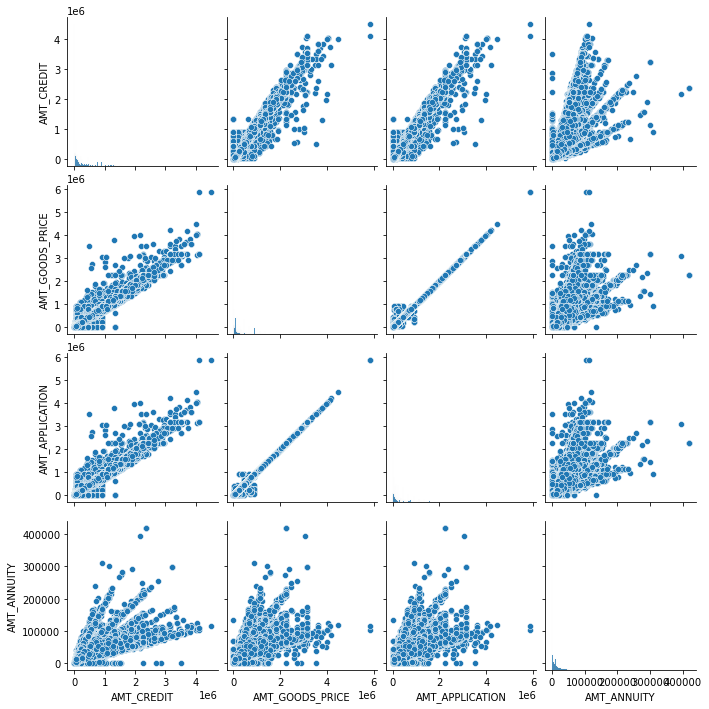

In [58]:
target0_columns = merged_application_data_df[['AMT_CREDIT','AMT_GOODS_PRICE','AMT_APPLICATION','AMT_ANNUITY']].fillna(0)
sns.pairplot(target0_columns)

plt.show()

###### for defaulters previous applications

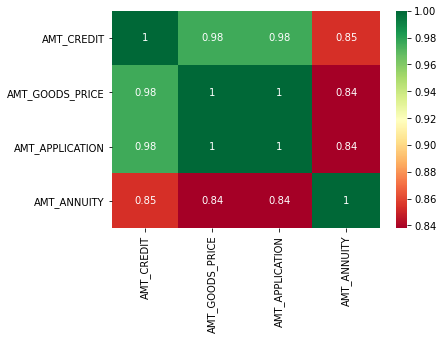

In [55]:

target0_columns = prev_defaulter_df[['AMT_CREDIT','AMT_GOODS_PRICE','AMT_APPLICATION','AMT_ANNUITY']].fillna(0)
sns.heatmap(target0_columns.corr(),cmap = "RdYlGn", annot=True)

plt.show()

###### for non defaulters previous applications

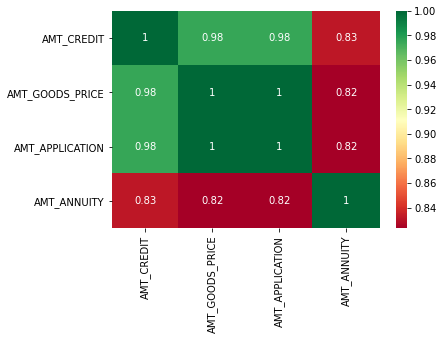

In [56]:

target1_columns = prev_non_defaulter_df[['AMT_CREDIT','AMT_GOODS_PRICE','AMT_APPLICATION','AMT_ANNUITY']].fillna(0)
sns.heatmap(target1_columns.corr(),cmap = "RdYlGn", annot=True)

plt.show()

##### Bivariate Categorical- Numerical
- 


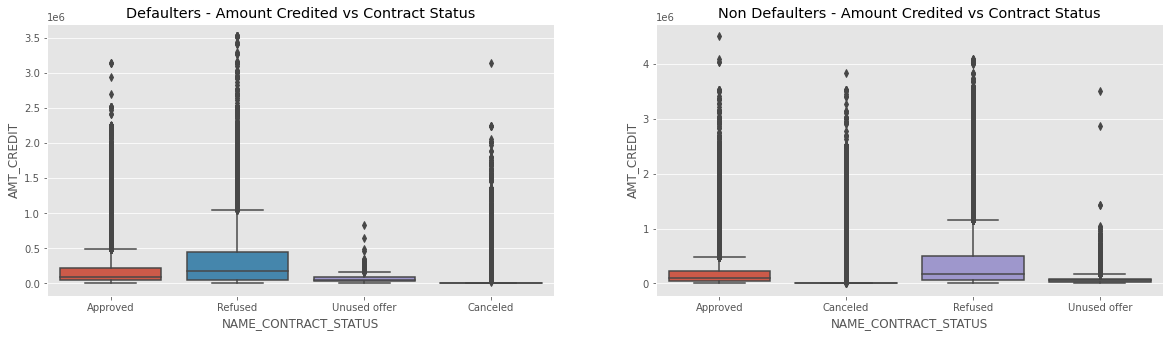

In [96]:
plt.style.use('ggplot')
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Defaulters - Amount Credited vs Contract Status")
sns.boxplot(x = 'NAME_CONTRACT_STATUS', y = 'AMT_CREDIT', data = prev_defaulter_df)

plt.subplot(1,2,2)
plt.title("Non Defaulters - Amount Credited vs Contract Status")
sns.boxplot(x  = 'NAME_CONTRACT_STATUS', y = 'AMT_CREDIT', data = prev_non_defaulter_df)
plt.show()

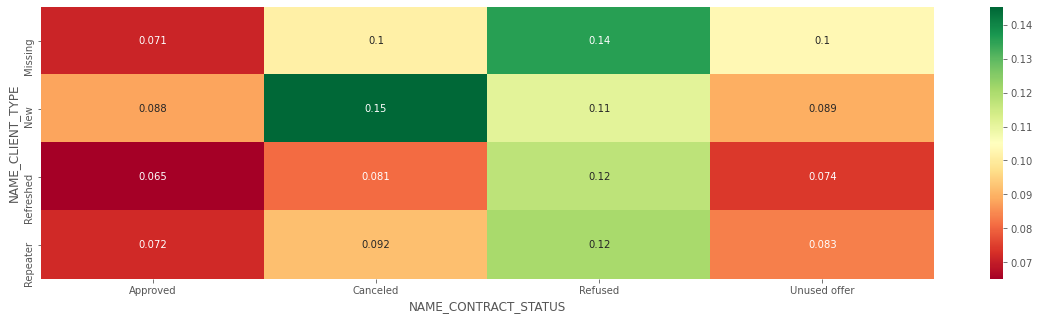

In [105]:
plt.figure(figsize=[20,5])
table = pd.pivot_table(merged_application_data_df, values='TARGET', index=['NAME_CLIENT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
sns.heatmap(table,cmap = "RdYlGn", annot=True)
plt.show()

Inferences:
    1. New applicants with previous cancelled history have high  indicators of defaulting
    2. In general applications refused previously have high chances of defaulting because 
    from above graph a repeater who was refused previously indicates high chances of defaulting,
    so is the case with refreshened and new applicants.

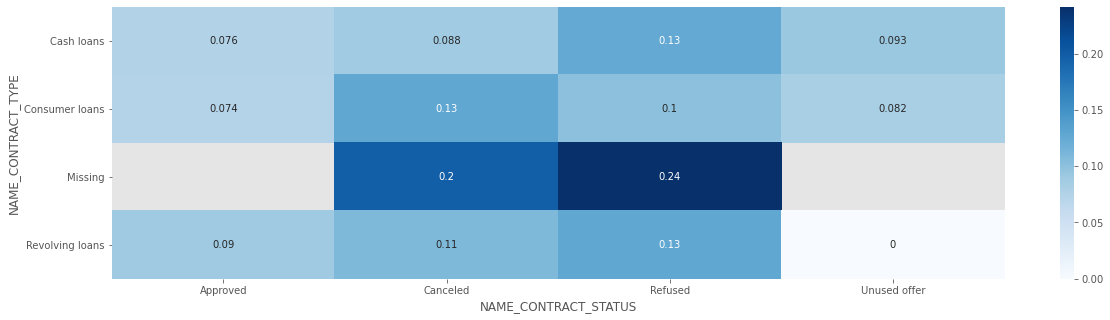

In [109]:
plt.figure(figsize=[20,5])
table = pd.pivot_table(merged_application_data_df, values='TARGET', index=['NAME_CONTRACT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
sns.heatmap(table,cmap = "Blues", annot=True)
plt.show()

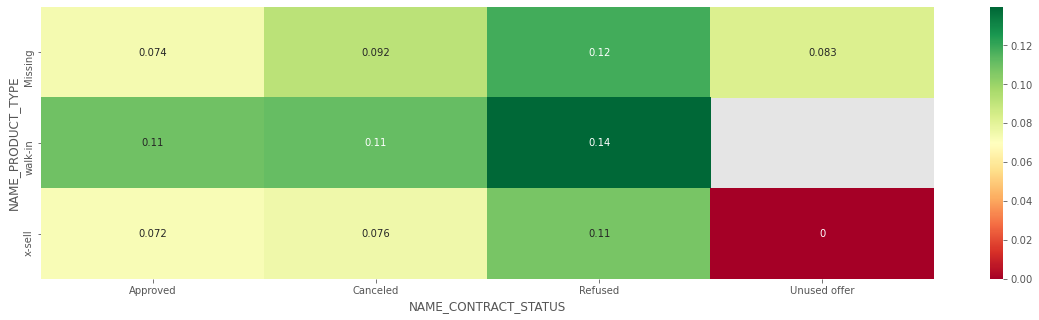

In [111]:
plt.figure(figsize=[20,5])
table = pd.pivot_table(merged_application_data_df, values='TARGET', index=['NAME_PRODUCT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
sns.heatmap(table,cmap = "RdYlGn", annot=True)
plt.show()

In [143]:
merged_application_data_df.drop(['DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DRAWING'],inplace=True,axis=1)
correlation=merged_application_data_df.corr(method = 'pearson')
correlation=correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool))
correlation_df=correlation.unstack().reset_index()
correlation_df.columns = ['Correlation variable 1','Correlation variable 2','CORRELATION']
correlation_df.dropna(subset=['CORRELATION'],inplace=True)
correlation_df['Absolute_Correlation']=correlation_df['CORRELATION'].abs()
correlation_df = correlation_df.sort_values('Absolute_Correlation', ascending=False).head(10)
correlation_df

Correlation variable 1 Correlation variable 2  CORRELATION  \
100        AMT_GOODS_PRICE        AMT_APPLICATION     0.999871   
101        AMT_GOODS_PRICE             AMT_CREDIT     0.993201   
84              AMT_CREDIT        AMT_APPLICATION     0.975683   
237       DAYS_TERMINATION          DAYS_LAST_DUE     0.927535   
99         AMT_GOODS_PRICE            AMT_ANNUITY     0.822204   
83              AMT_CREDIT            AMT_ANNUITY     0.817977   
67         AMT_APPLICATION            AMT_ANNUITY     0.809972   
180            CNT_PAYMENT        AMT_APPLICATION     0.683056   
181            CNT_PAYMENT             AMT_CREDIT     0.675539   
182            CNT_PAYMENT        AMT_GOODS_PRICE     0.674547   

     Absolute_Correlation  
100              0.999871  
101              0.993201  
84               0.975683  
237              0.927535  
99               0.822204  
83               0.817977  
67               0.809972  
180              0.683056  
181              0.675539  
182              0.674547